# Credit Card Eligibility Analysis 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("Credit_report.csv")
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [3]:
df.shape

(100000, 28)

In [4]:
print(df.columns)

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')


In [5]:
df.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,98035.000000,100000.000000,100000.000000
mean,4194.170850,17.091280,22.47443,72.466040,21.068780,27.754251,32.285173,1403.118217
std,3183.686167,117.404834,129.05741,466.422621,14.860104,193.177339,5.116875,8306.041270
min,303.645417,-1.000000,0.00000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1625.568229,3.000000,4.00000,8.000000,10.000000,3.000000,28.052567,30.306660
50%,3093.745000,6.000000,5.00000,13.000000,18.000000,6.000000,32.305784,69.249473
75%,5957.448333,7.000000,7.00000,20.000000,28.000000,9.000000,36.496663,161.224249
max,15204.633333,1798.000000,1499.00000,5797.000000,67.000000,2597.000000,50.000000,82331.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [7]:
df.isna().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

In [8]:
def seprate_data_types(df):
    categorical = []
    continuous = []
    for column in df.columns:                # looping on the number of columns
        if df[column].nunique() < 100:       # nunique:  returns unique values in the column,
                                                    #here 100 is the hyperparamter and can be changed
            categorical.append(column)
        else:
            continuous.append(column)
            
    return categorical, continuous 


categorical, continuous = seprate_data_types(df)         # Calling the function

# # Tabulate is a package used to print the list, dict or any data sets in a proper format; in table format
from tabulate import tabulate
table = [categorical, continuous]
print(tabulate({"Categorical":categorical,
                "continuous": continuous}, headers = ["categorical", "continuous"]))

categorical            continuous
---------------------  ------------------------
Month                  ID
Occupation             Customer_ID
Delay_from_due_date    Name
Credit_Mix             Age
Payment_of_Min_Amount  SSN
Payment_Behaviour      Annual_Income
Credit_Score           Monthly_Inhand_Salary
                       Num_Bank_Accounts
                       Num_Credit_Card
                       Interest_Rate
                       Num_of_Loan
                       Type_of_Loan
                       Num_of_Delayed_Payment
                       Changed_Credit_Limit
                       Num_Credit_Inquiries
                       Outstanding_Debt
                       Credit_Utilization_Ratio
                       Credit_History_Age
                       Total_EMI_per_month
                       Amount_invested_monthly
                       Monthly_Balance


In [9]:
for i in df.columns:
    print(i , ":", df[str(i)].nunique())

ID : 100000
Customer_ID : 12500
Month : 8
Name : 10139
Age : 1788
SSN : 12501
Occupation : 16
Annual_Income : 18940
Monthly_Inhand_Salary : 13235
Num_Bank_Accounts : 943
Num_Credit_Card : 1179
Interest_Rate : 1750
Num_of_Loan : 434
Type_of_Loan : 6260
Delay_from_due_date : 73
Num_of_Delayed_Payment : 749
Changed_Credit_Limit : 4384
Num_Credit_Inquiries : 1223
Credit_Mix : 4
Outstanding_Debt : 13178
Credit_Utilization_Ratio : 100000
Credit_History_Age : 404
Payment_of_Min_Amount : 3
Total_EMI_per_month : 14950
Amount_invested_monthly : 91049
Payment_Behaviour : 7
Monthly_Balance : 98792
Credit_Score : 3


In [10]:
new_df=df.drop(["ID","Customer_ID","Name","SSN","Credit_History_Age","Type_of_Loan"], axis=1)
new_df

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,January,23,Scientist,19114.12,1824.843333,3,4,3,4,3,...,4.0,_,809.98,26.822620,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,February,23,Scientist,19114.12,NaN,3,4,3,4,-1,...,4.0,Good,809.98,31.944960,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,March,-500,Scientist,19114.12,NaN,3,4,3,4,3,...,4.0,Good,809.98,28.609352,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,April,23,Scientist,19114.12,NaN,3,4,3,4,5,...,4.0,Good,809.98,31.377862,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,May,23,Scientist,19114.12,1824.843333,3,4,3,4,6,...,4.0,Good,809.98,24.797347,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,April,25,Mechanic,39628.99,3359.415833,4,6,7,2,23,...,3.0,_,502.38,34.663572,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.866228,Poor
99996,May,25,Mechanic,39628.99,3359.415833,4,6,7,2,18,...,3.0,_,502.38,40.565631,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.65161,Poor
99997,June,25,Mechanic,39628.99,3359.415833,4,6,5729,2,27,...,3.0,Good,502.38,41.255522,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.809083,Poor
99998,July,25,Mechanic,39628.99,3359.415833,4,6,7,2,20,...,3.0,Good,502.38,33.638208,No,35.104023,251.67258219721603,Low_spent_Large_value_payments,319.164979,Standard


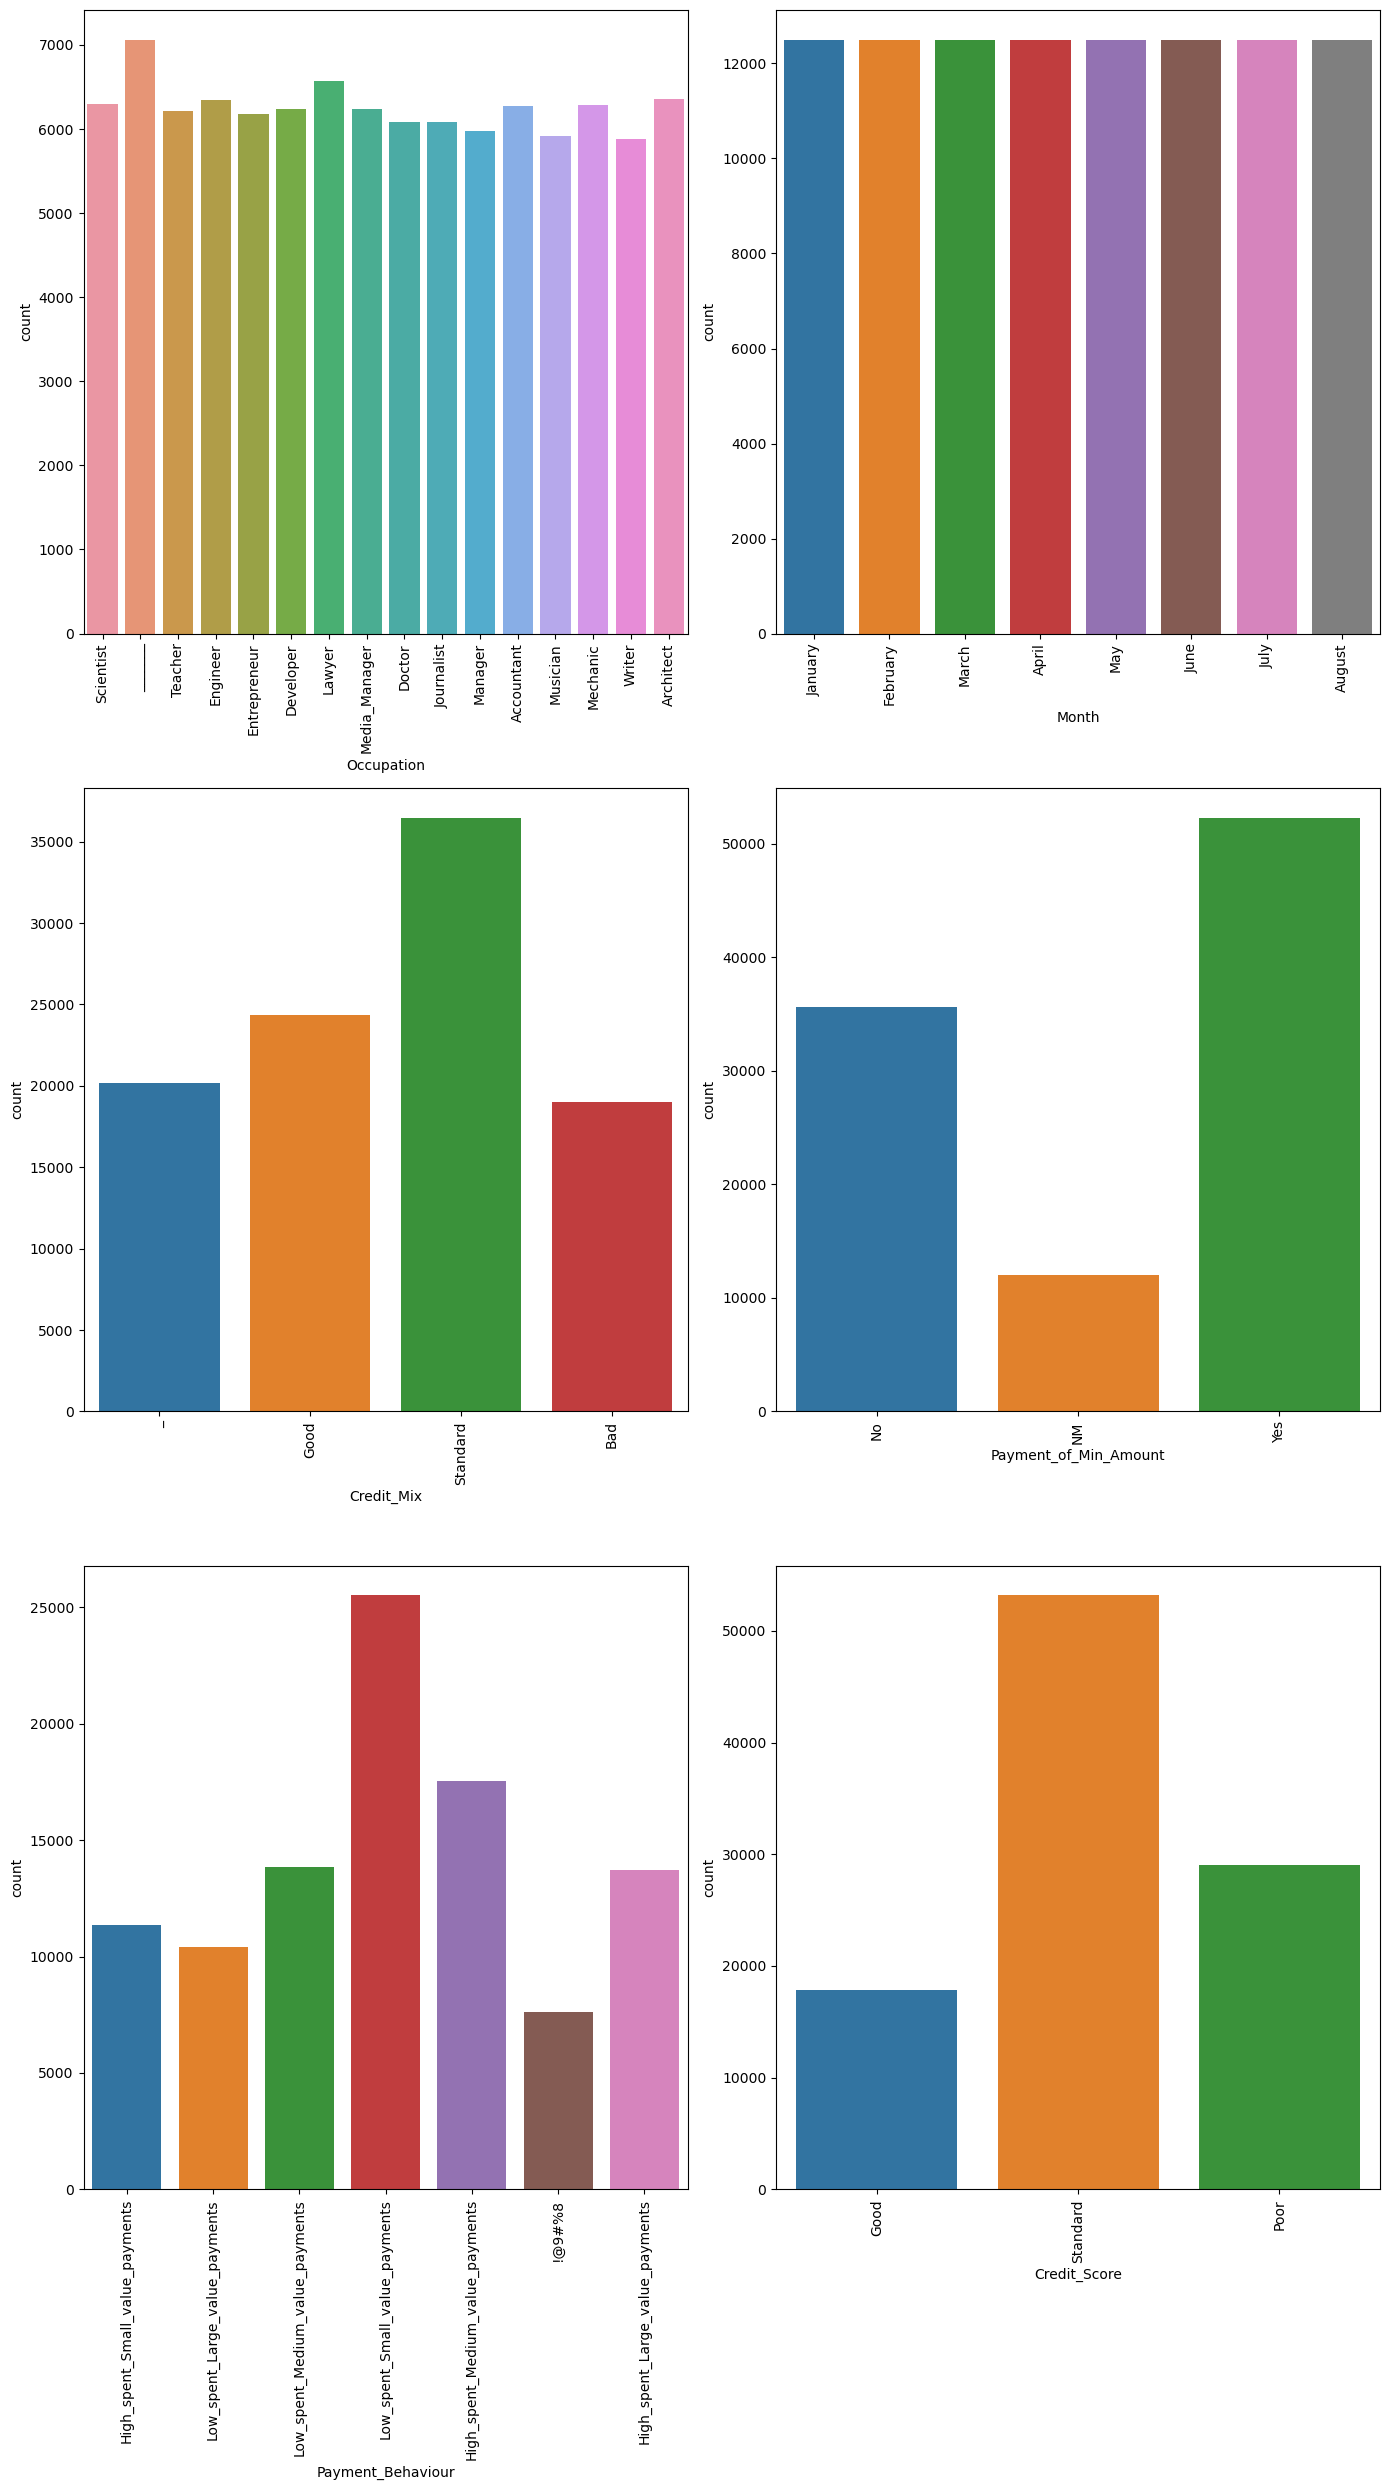

In [11]:
data=["Occupation","Month","Credit_Mix","Payment_of_Min_Amount","Payment_Behaviour","Credit_Score"]
fig, axs=plt.subplots(nrows = 3, ncols = 2, figsize = (14,25))
axs =axs.flatten()
for i , var in enumerate(data):
    sns.countplot(x = var, data = new_df, ax = axs[i])
    axs[i].set_xticklabels(axs[i].get_xticklabels(),rotation=90)
fig.tight_layout()
plt.show()

In [12]:
# Replace "_______" with an empty string in the "Occupation" column
new_df["Occupation"].replace("_______","unidentified", inplace=True)

# Replace "_" with an empty string in the "Credit_Mix" column
new_df["Credit_Mix"].replace("_","others", inplace=True)

# Replace "_" with an empty string in the "Credit_Mix" column
new_df["Payment_Behaviour"].replace("!@9#%8","others", inplace=True)

# Count unique values in the modified DataFrame
occupation_unique_count = new_df["Occupation"].nunique()
credit_mix_unique_count = new_df["Credit_Mix"].nunique()
Payment_Behaviour_unique_count = new_df["Payment_Behaviour"].nunique()


print("Unique Occupations:", occupation_unique_count)
print("Unique Credit Mixes:", credit_mix_unique_count)
print("Unique Payment ehaviour:", Payment_Behaviour_unique_count)


Unique Occupations: 16
Unique Credit Mixes: 4
Unique Payment ehaviour: 7


In [13]:
print(new_df["Credit_Mix"].unique())
print(new_df["Occupation"].unique())
print(new_df["Payment_Behaviour"].unique())

['others' 'Good' 'Standard' 'Bad']
['Scientist' 'unidentified' 'Teacher' 'Engineer' 'Entrepreneur'
 'Developer' 'Lawyer' 'Media_Manager' 'Doctor' 'Journalist' 'Manager'
 'Accountant' 'Musician' 'Mechanic' 'Writer' 'Architect']
['High_spent_Small_value_payments' 'Low_spent_Large_value_payments'
 'Low_spent_Medium_value_payments' 'Low_spent_Small_value_payments'
 'High_spent_Medium_value_payments' 'others'
 'High_spent_Large_value_payments']


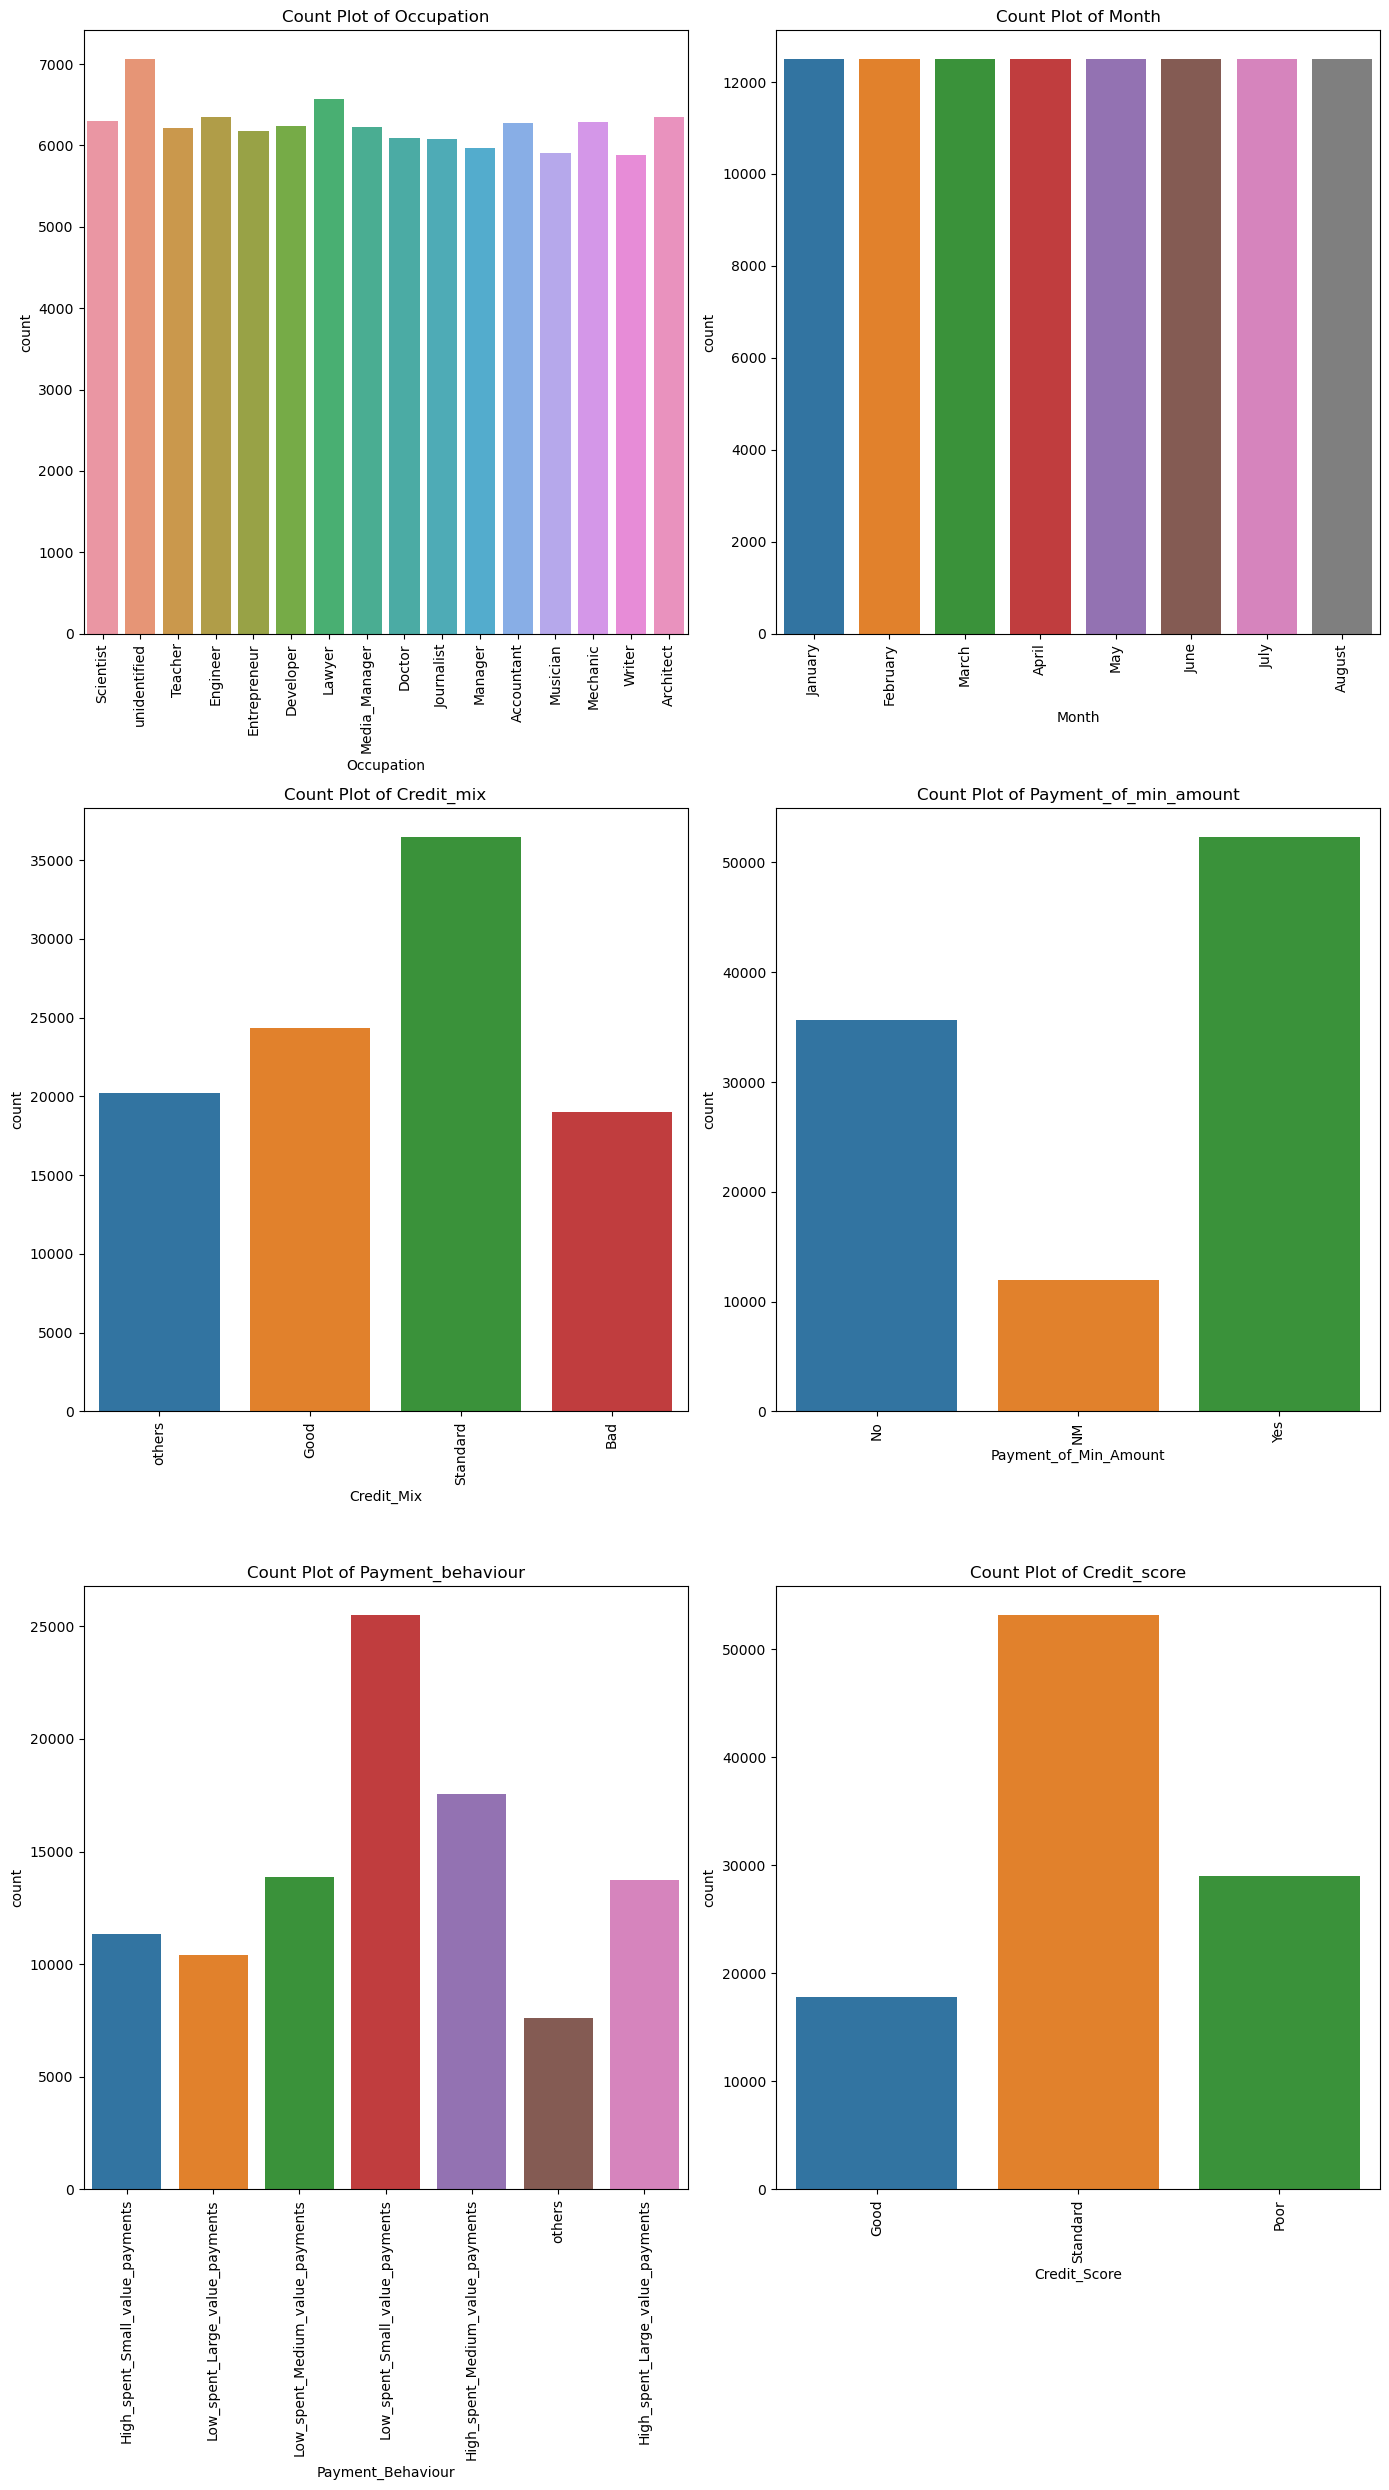

In [14]:
data=["Occupation","Month","Credit_Mix","Payment_of_Min_Amount","Payment_Behaviour","Credit_Score"]
fig, axs=plt.subplots(nrows = 3, ncols = 2, figsize = (14,25))
axs =axs.flatten()
for i , var in enumerate(data):
    sns.countplot(x = var, data = new_df, ax = axs[i])
    axs[i].set_xticklabels(axs[i].get_xticklabels(),rotation=90)
    axs[i].set_title(f"Count Plot of {data[i].capitalize()}")  # Set the title with variable name
fig.tight_layout()
plt.show()

In [15]:
new_df.isna().sum()

Month                           0
Age                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

In [16]:
new_df.shape

(100000, 22)

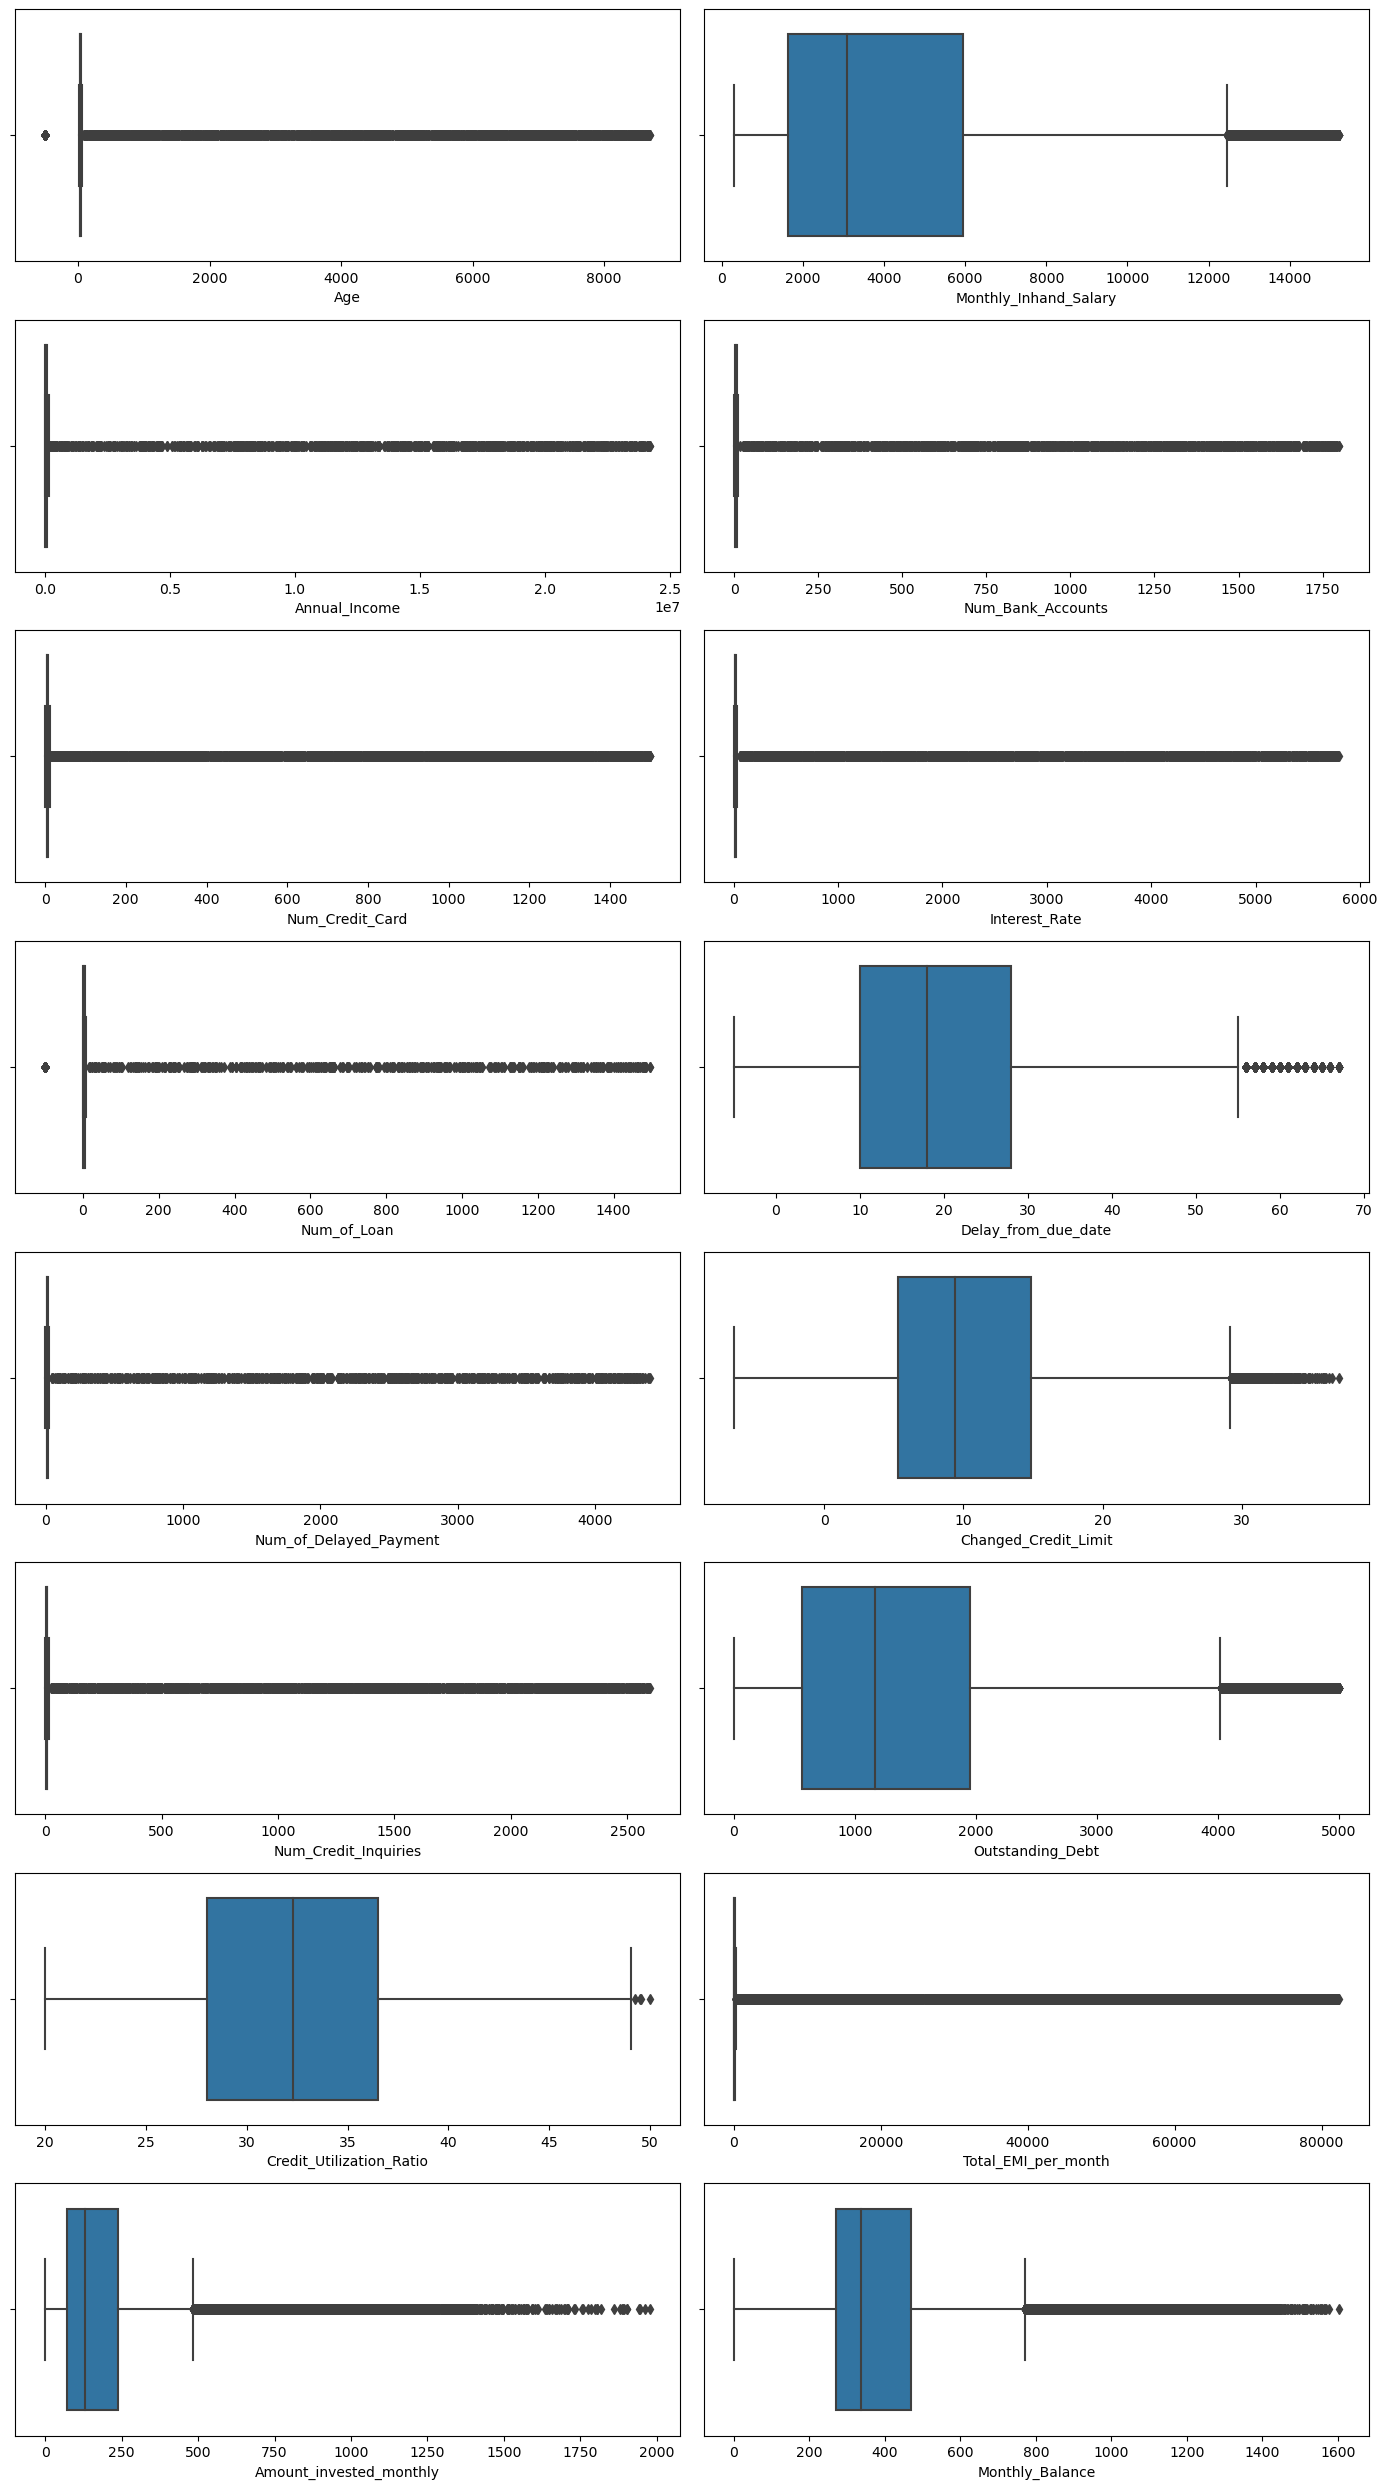

In [17]:
data = ["Age","Monthly_Inhand_Salary", "Annual_Income", "Num_Bank_Accounts", "Num_Credit_Card", "Interest_Rate",
        "Num_of_Loan","Delay_from_due_date", "Num_of_Delayed_Payment", "Changed_Credit_Limit",
        "Num_Credit_Inquiries", "Outstanding_Debt", "Credit_Utilization_Ratio",
        "Total_EMI_per_month", "Amount_invested_monthly", "Monthly_Balance"]

# Convert columns to numeric types
numeric_columns = [pd.to_numeric(new_df[column], errors='coerce') for column in data]

fig, axs = plt.subplots(nrows=8, ncols=2, figsize=(14, 25))
axs = axs.flatten()

for i, var in enumerate(numeric_columns):
    sns.boxplot(x=var, ax=axs[i])
fig.tight_layout()
plt.show()

In [18]:
def info_of_numerical(col):
    print(f"The mean of the {col} is {new_df[col].mean()}")
    print(f"The median of the {col} is {new_df[col].median()}")
    print(f"The mode of the {col} is {new_df[col].mode()[0]}")
    print(f"The standard deviation of the {col} is {new_df[col].std()}")
    print(f"Number of missing values in the {col} is {new_df[col].isnull().sum()}")

In [19]:
column_name = 'Age'
new_df[column_name] = new_df[column_name].str.replace('_', '').astype(float)
info_of_numerical("Age")

The mean of the Age is 110.6497
The median of the Age is 33.0
The mode of the Age is 38.0
The standard deviation of the Age is 686.2447166048156
Number of missing values in the Age is 0


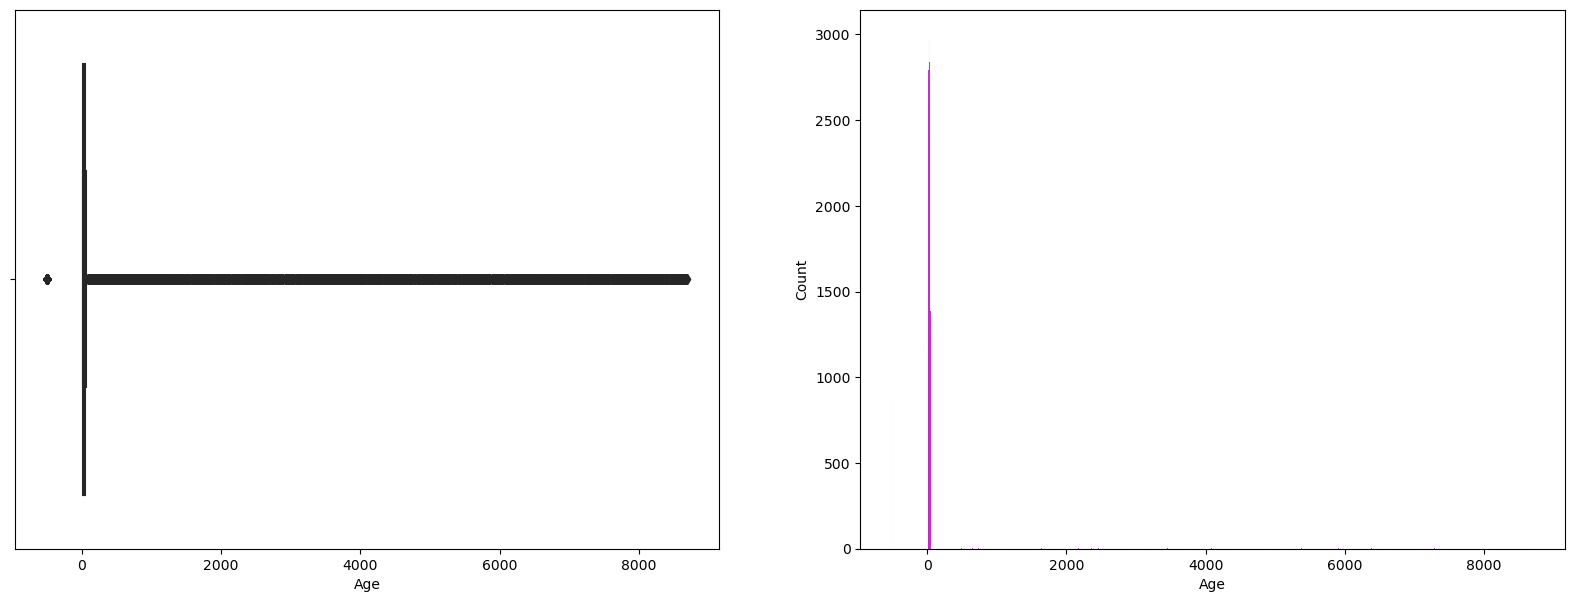

In [20]:
fig, ax = plt.subplots(1, 2, figsize= (20, 7))               # Creating the space for the 2 images, first argument in subplots is rows and second is columns and the figure size
sns.histplot(x = new_df["Age"], ax =ax[1], color = "m") # ax[1] means image will plot at the second space
sns.boxplot(x = new_df["Age"], ax = ax[0], color = "g") # ax[0] means image will plot at the second space
plt.show()

In [21]:
column_name = 'Annual_Income'
new_df[column_name] = new_df[column_name].str.replace('_', '').astype(float)
info_of_numerical("Annual_Income")

The mean of the Annual_Income is 176415.70129814756
The median of the Annual_Income is 37578.61
The mode of the Annual_Income is 9141.63
The standard deviation of the Annual_Income is 1429618.0514141466
Number of missing values in the Annual_Income is 0


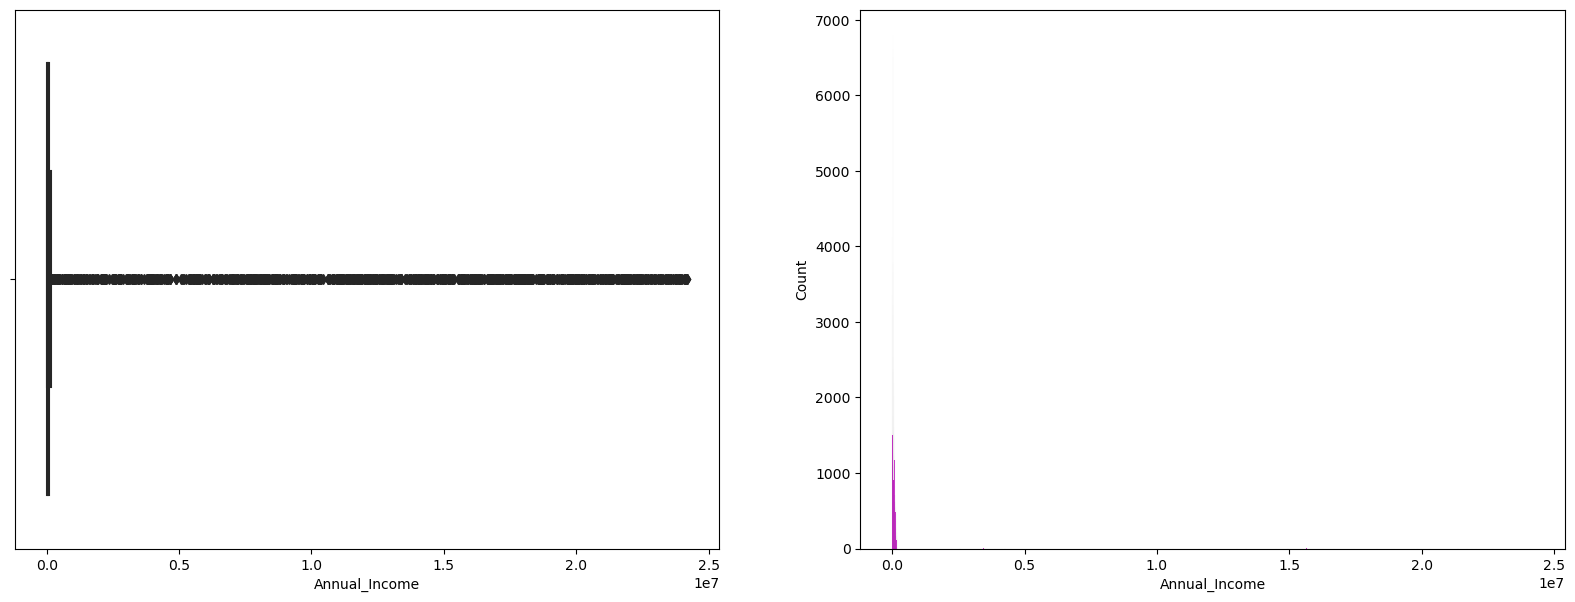

In [22]:
fig, ax = plt.subplots(1, 2, figsize= (20, 7))               # Creating the space for the 2 images, first argument in subplots is rows and second is columns and the figure size
sns.histplot(x = new_df["Annual_Income"], ax =ax[1], color = "m") # ax[1] means image will plot at the second space
sns.boxplot(x = new_df["Annual_Income"], ax = ax[0], color = "g") # ax[0] means image will plot at the second space
plt.show()

In [23]:
info_of_numerical("Monthly_Inhand_Salary")

The mean of the Monthly_Inhand_Salary is 4194.170849600323
The median of the Monthly_Inhand_Salary is 3093.745000000001
The mode of the Monthly_Inhand_Salary is 2295.058333333333
The standard deviation of the Monthly_Inhand_Salary is 3183.6861668732963
Number of missing values in the Monthly_Inhand_Salary is 15002


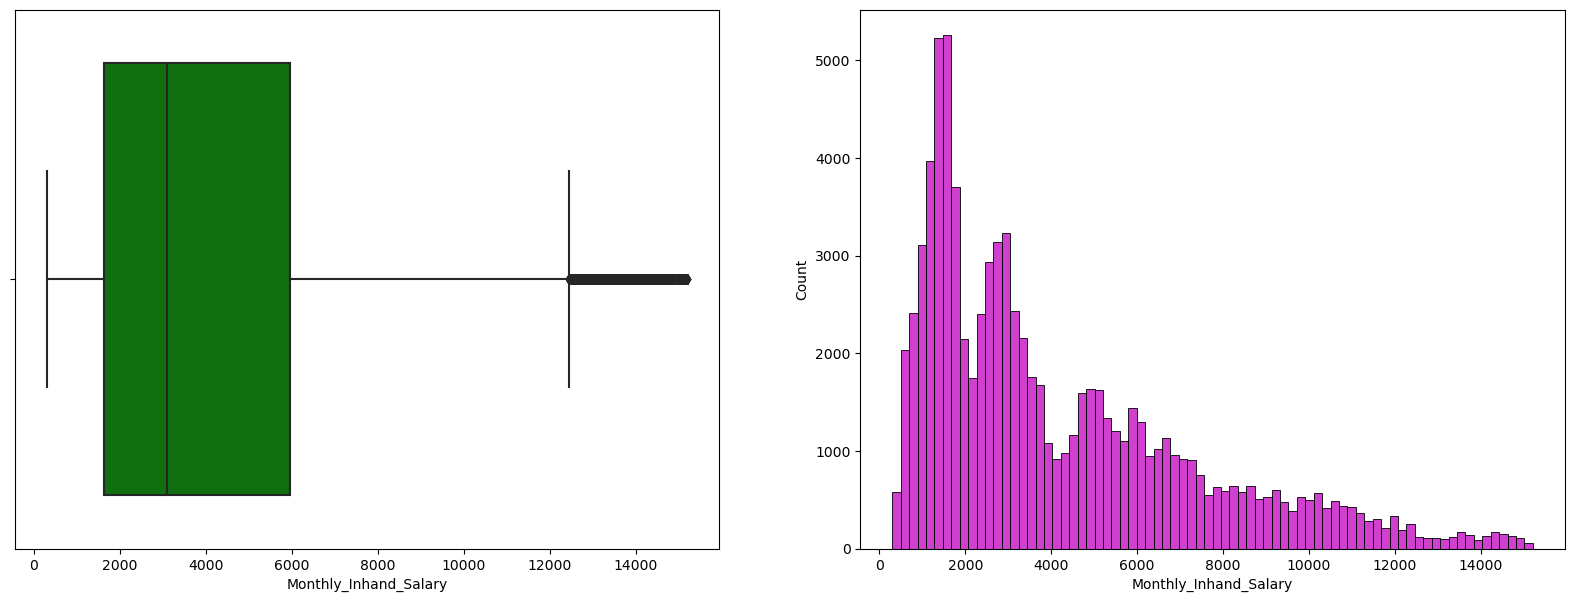

In [24]:
fig, ax = plt.subplots(1, 2, figsize= (20, 7))               # Creating the space for the 2 images, first argument in subplots is rows and second is columns and the figure size
sns.histplot(x = new_df["Monthly_Inhand_Salary"], ax =ax[1], color = "m") # ax[1] means image will plot at the second space
sns.boxplot(x = new_df["Monthly_Inhand_Salary"], ax = ax[0], color = "g") # ax[0] means image will plot at the second space
plt.show()

In [25]:
info_of_numerical("Num_Bank_Accounts")

The mean of the Num_Bank_Accounts is 17.09128
The median of the Num_Bank_Accounts is 6.0
The mode of the Num_Bank_Accounts is 6
The standard deviation of the Num_Bank_Accounts is 117.40483442734045
Number of missing values in the Num_Bank_Accounts is 0


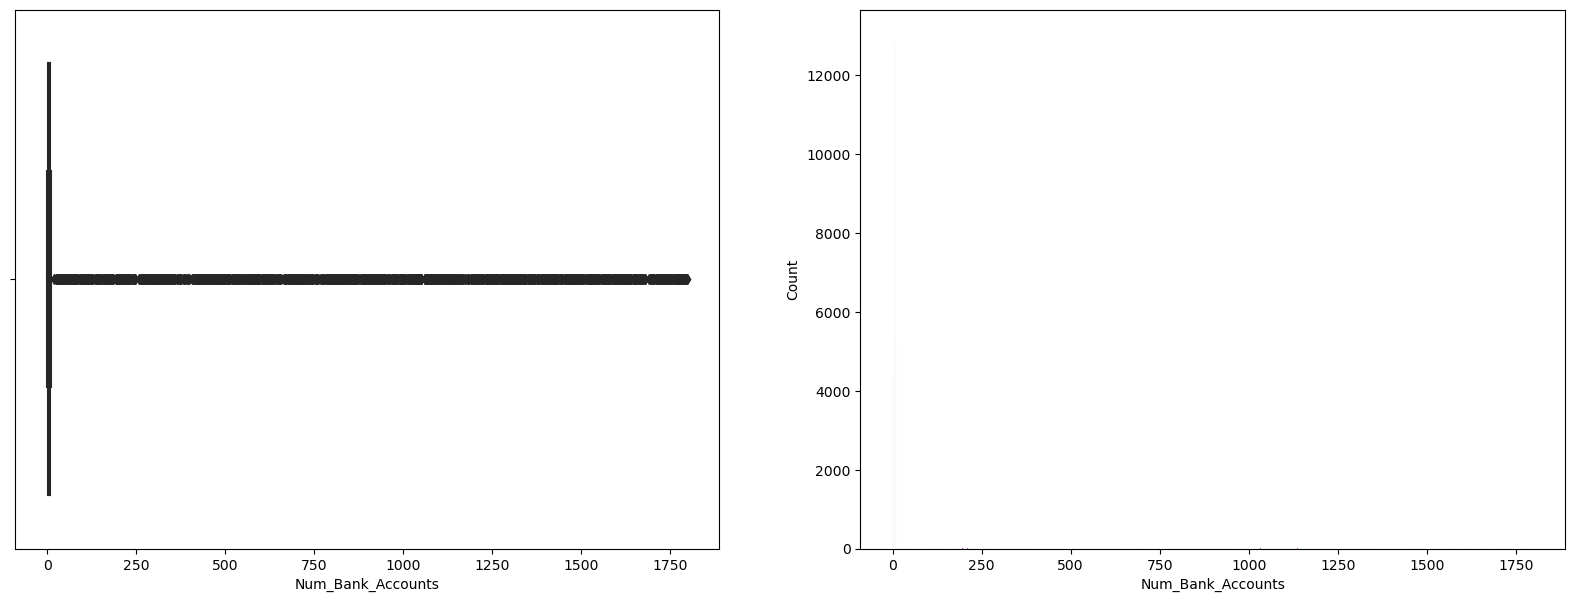

In [26]:
fig, ax = plt.subplots(1, 2, figsize= (20, 7))               # Creating the space for the 2 images, first argument in subplots is rows and second is columns and the figure size
sns.histplot(x = new_df["Num_Bank_Accounts"], ax =ax[1], color = "m") # ax[1] means image will plot at the second space
sns.boxplot(x = new_df["Num_Bank_Accounts"], ax = ax[0], color = "g") # ax[0] means image will plot at the second space
plt.show()

In [27]:
info_of_numerical("Num_Credit_Card")

The mean of the Num_Credit_Card is 22.47443
The median of the Num_Credit_Card is 5.0
The mode of the Num_Credit_Card is 5
The standard deviation of the Num_Credit_Card is 129.05741011011912
Number of missing values in the Num_Credit_Card is 0


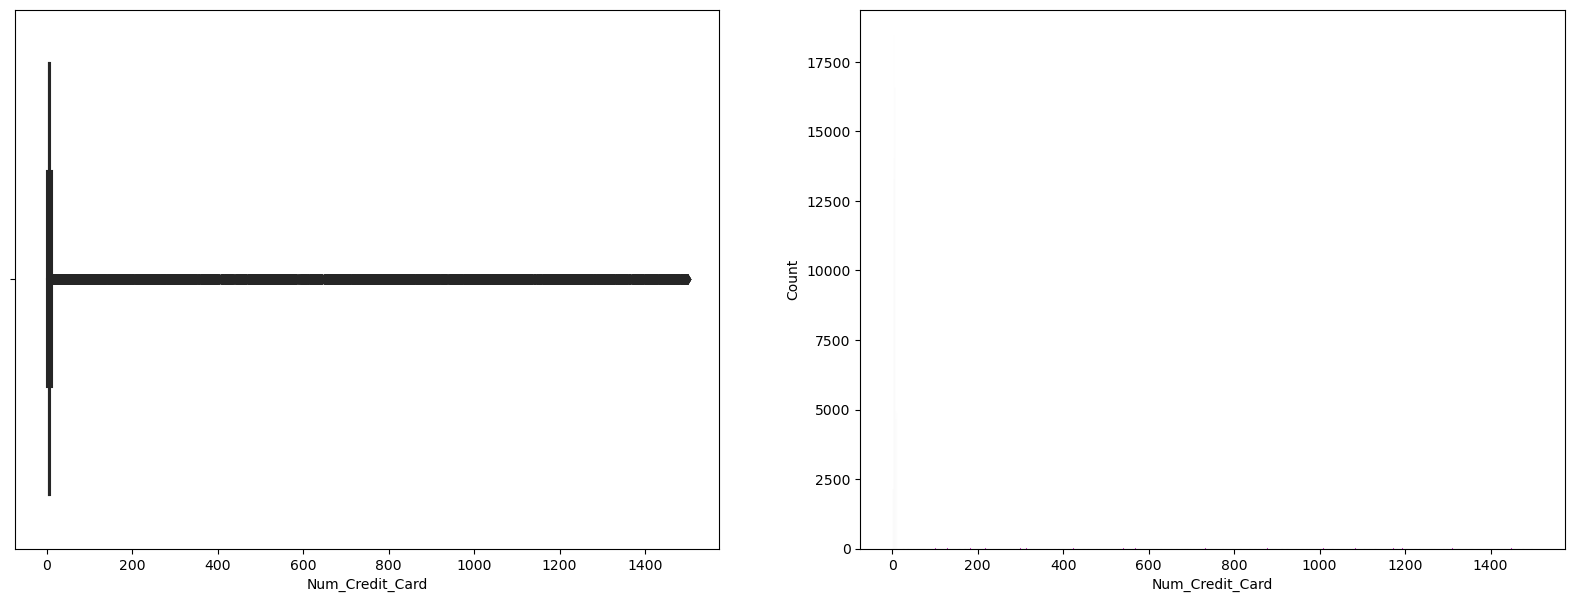

In [28]:
fig, ax = plt.subplots(1, 2, figsize= (20, 7))               # Creating the space for the 2 images, first argument in subplots is rows and second is columns and the figure size
sns.histplot(x = new_df["Num_Credit_Card"], ax =ax[1], color = "m") # ax[1] means image will plot at the second space
sns.boxplot(x = new_df["Num_Credit_Card"], ax = ax[0], color = "g") # ax[0] means image will plot at the second space
plt.show()

In [29]:
info_of_numerical("Interest_Rate")

The mean of the Interest_Rate is 72.46604
The median of the Interest_Rate is 13.0
The mode of the Interest_Rate is 8
The standard deviation of the Interest_Rate is 466.4226212217413
Number of missing values in the Interest_Rate is 0


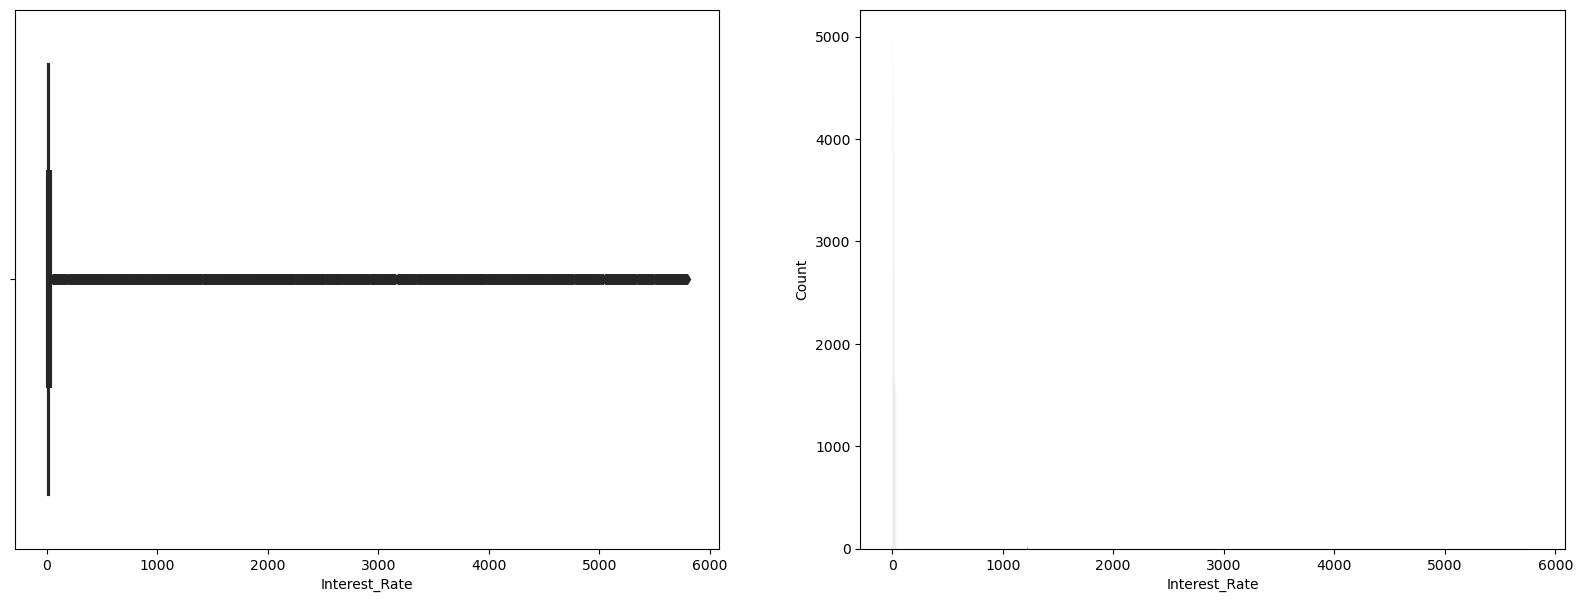

In [30]:
fig, ax = plt.subplots(1, 2, figsize= (20, 7))               # Creating the space for the 2 images, first argument in subplots is rows and second is columns and the figure size
sns.histplot(x = new_df["Interest_Rate"], ax =ax[1], color = "m") # ax[1] means image will plot at the second space
sns.boxplot(x = new_df["Interest_Rate"], ax = ax[0], color = "g") # ax[0] means image will plot at the second space
plt.show()

In [31]:
column_name = 'Num_of_Loan'
new_df[column_name] = new_df[column_name].str.replace('_', '').astype(float)
info_of_numerical("Num_of_Loan")

The mean of the Num_of_Loan is 3.00996
The median of the Num_of_Loan is 3.0
The mode of the Num_of_Loan is 3.0
The standard deviation of the Num_of_Loan is 62.64787936048566
Number of missing values in the Num_of_Loan is 0


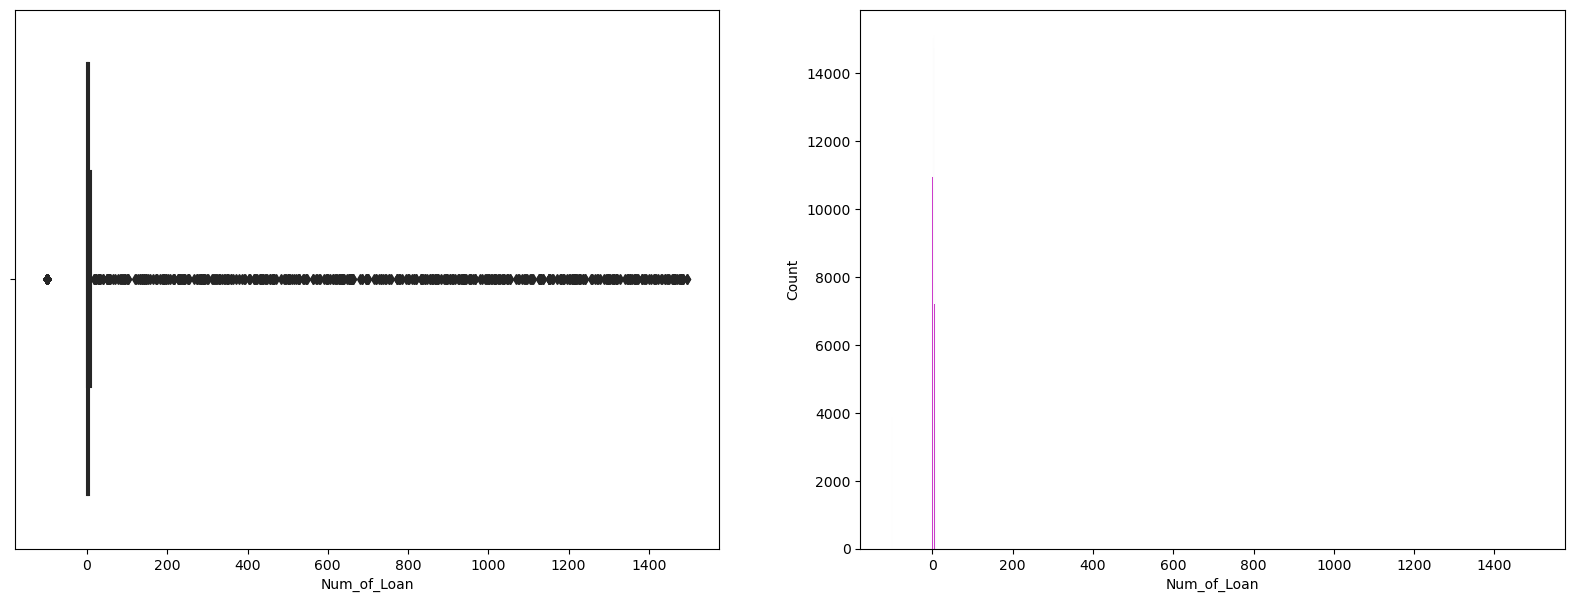

In [32]:
fig, ax = plt.subplots(1, 2, figsize= (20, 7))               # Creating the space for the 2 images, first argument in subplots is rows and second is columns and the figure size
sns.histplot(x = new_df["Num_of_Loan"], ax =ax[1], color = "m") # ax[1] means image will plot at the second space
sns.boxplot(x = new_df["Num_of_Loan"], ax = ax[0], color = "g") # ax[0] means image will plot at the second space
plt.show()

In [33]:
info_of_numerical("Delay_from_due_date")

The mean of the Delay_from_due_date is 21.06878
The median of the Delay_from_due_date is 18.0
The mode of the Delay_from_due_date is 15
The standard deviation of the Delay_from_due_date is 14.860104223677403
Number of missing values in the Delay_from_due_date is 0


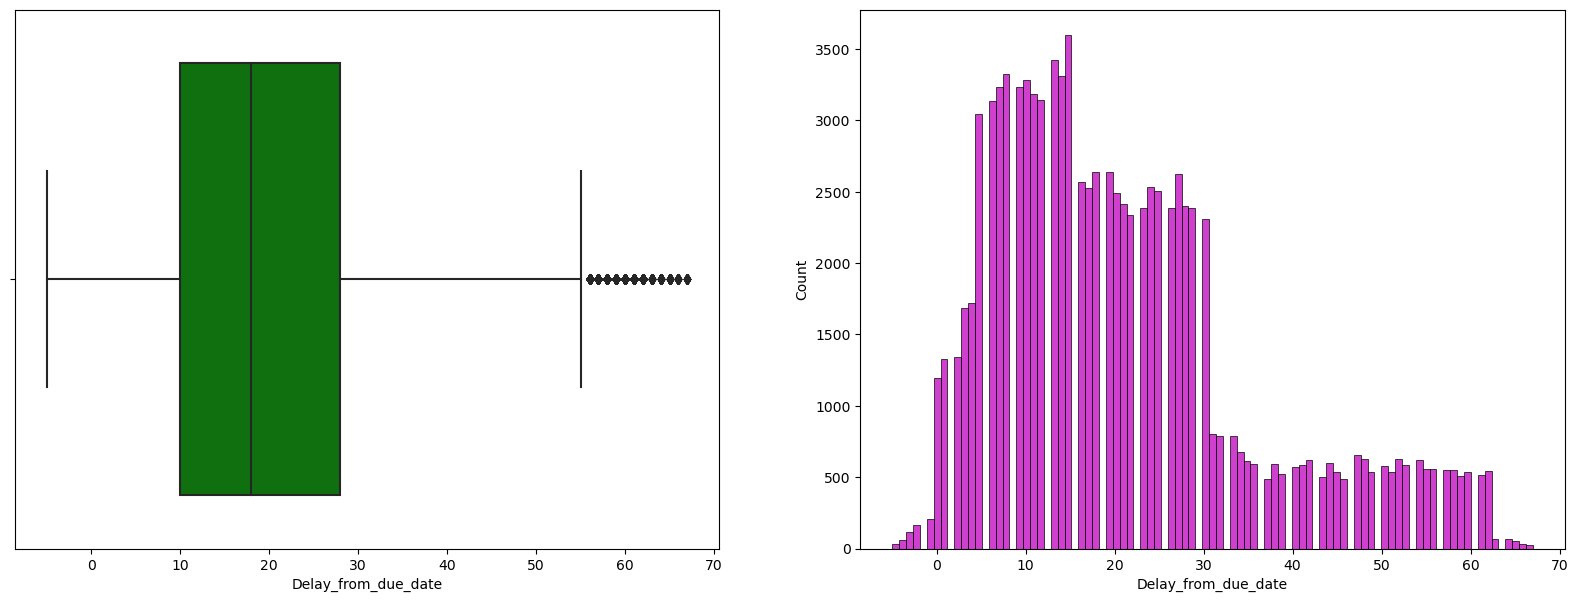

In [34]:
fig, ax = plt.subplots(1, 2, figsize= (20, 7))               # Creating the space for the 2 images, first argument in subplots is rows and second is columns and the figure size
sns.histplot(x = new_df["Delay_from_due_date"], ax =ax[1], color = "m") # ax[1] means image will plot at the second space
sns.boxplot(x = new_df["Delay_from_due_date"], ax = ax[0], color = "g") # ax[0] means image will plot at the second space
plt.show()

In [35]:
column_name = 'Num_of_Delayed_Payment'
new_df[column_name] = new_df[column_name].str.replace('_', '').astype(float)
info_of_numerical("Num_of_Delayed_Payment")

The mean of the Num_of_Delayed_Payment is 30.923342437471774
The median of the Num_of_Delayed_Payment is 14.0
The mode of the Num_of_Delayed_Payment is 19.0
The standard deviation of the Num_of_Delayed_Payment is 226.03189164449145
Number of missing values in the Num_of_Delayed_Payment is 7002


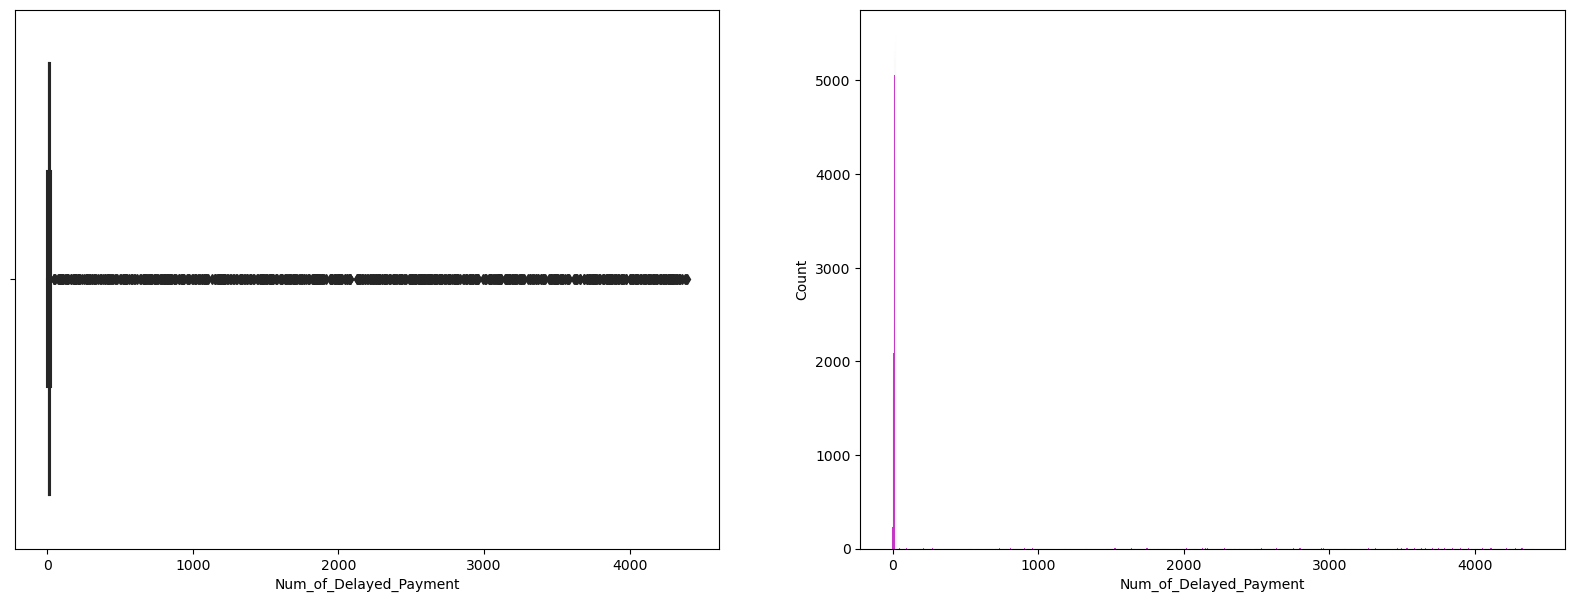

In [36]:
fig, ax = plt.subplots(1, 2, figsize= (20, 7))               # Creating the space for the 2 images, first argument in subplots is rows and second is columns and the figure size
sns.histplot(x = new_df["Num_of_Delayed_Payment"], ax =ax[1], color = "m") # ax[1] means image will plot at the second space
sns.boxplot(x = new_df["Num_of_Delayed_Payment"], ax = ax[0], color = "g") # ax[0] means image will plot at the second space
plt.show()

In [37]:
new_df["Changed_Credit_Limit"].replace("_", np.nan, inplace=True)

# Convert "Changed_Credit_Limit" column to numeric type
new_df["Changed_Credit_Limit"] = pd.to_numeric(new_df["Changed_Credit_Limit"], errors='coerce')

In [38]:
info_of_numerical("Changed_Credit_Limit")

The mean of the Changed_Credit_Limit is 10.389025115157766
The median of the Changed_Credit_Limit is 9.4
The mode of the Changed_Credit_Limit is 8.22
The standard deviation of the Changed_Credit_Limit is 6.789496202377595
Number of missing values in the Changed_Credit_Limit is 2091


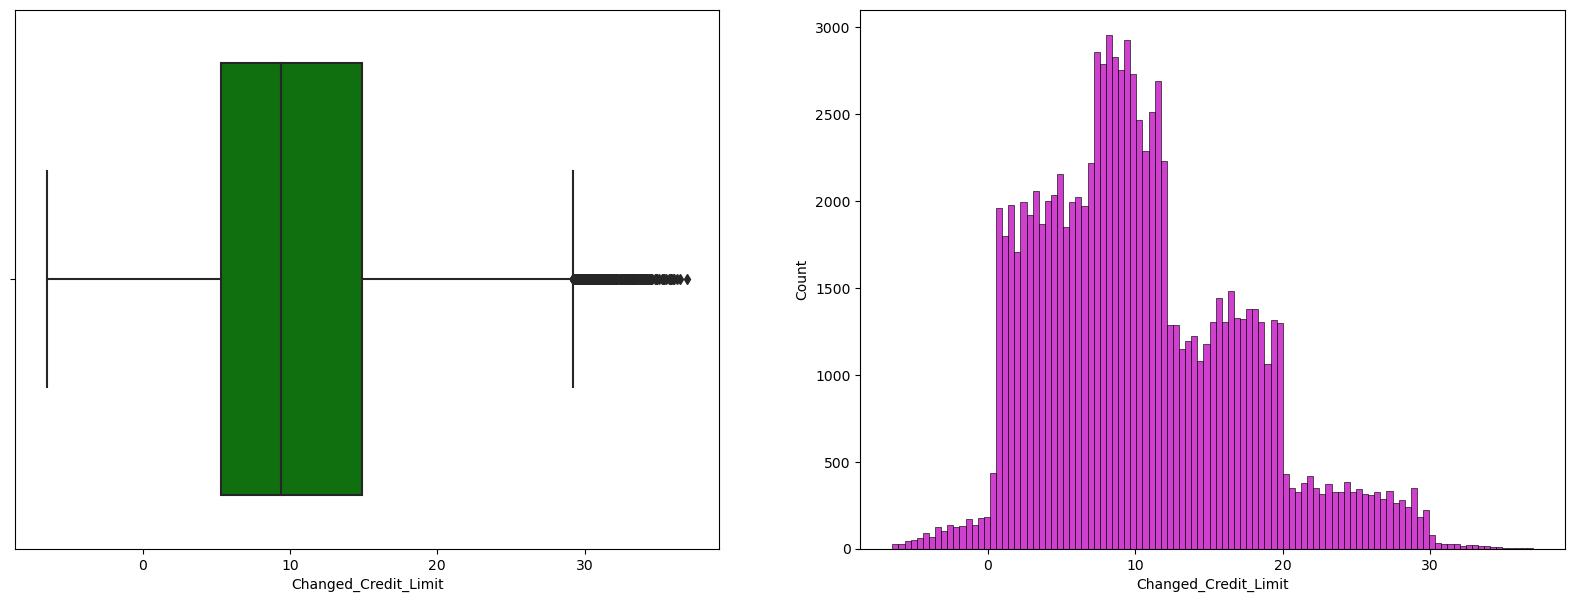

In [39]:
fig, ax = plt.subplots(1, 2, figsize= (20, 7))               # Creating the space for the 2 images, first argument in subplots is rows and second is columns and the figure size
sns.histplot(x = new_df["Changed_Credit_Limit"], ax =ax[1], color = "m") # ax[1] means image will plot at the second space
sns.boxplot(x = new_df["Changed_Credit_Limit"], ax = ax[0], color = "g") # ax[0] means image will plot at the second space
plt.show()

In [40]:
info_of_numerical("Num_Credit_Inquiries")

The mean of the Num_Credit_Inquiries is 27.75425103279441
The median of the Num_Credit_Inquiries is 6.0
The mode of the Num_Credit_Inquiries is 4.0
The standard deviation of the Num_Credit_Inquiries is 193.17733898001126
Number of missing values in the Num_Credit_Inquiries is 1965


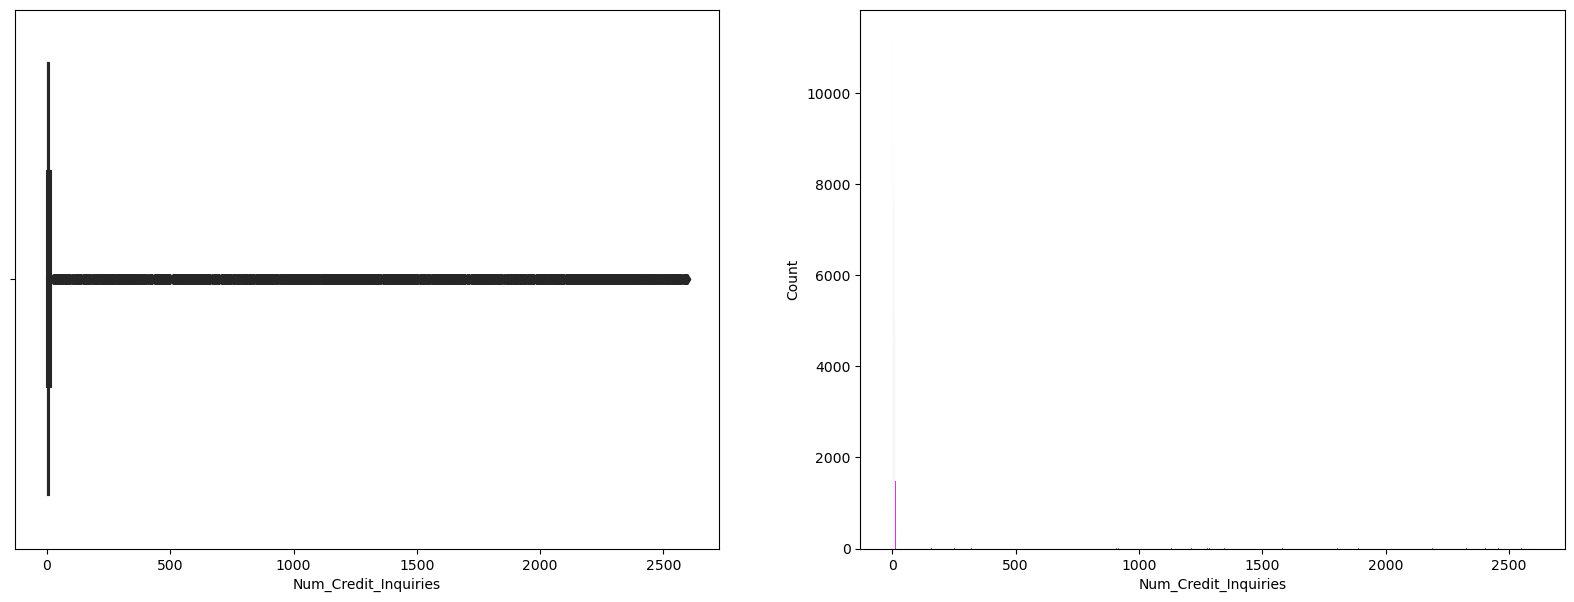

In [41]:
fig, ax = plt.subplots(1, 2, figsize= (20, 7))               # Creating the space for the 2 images, first argument in subplots is rows and second is columns and the figure size
sns.histplot(x = new_df["Num_Credit_Inquiries"], ax =ax[1], color = "m") # ax[1] means image will plot at the second space
sns.boxplot(x = new_df["Num_Credit_Inquiries"], ax = ax[0], color = "g") # ax[0] means image will plot at the second space
plt.show()

In [42]:
column_name = 'Outstanding_Debt'
new_df[column_name] = new_df[column_name].str.replace('_', '').astype(float)
info_of_numerical("Outstanding_Debt")

The mean of the Outstanding_Debt is 1426.220376000017
The median of the Outstanding_Debt is 1166.155
The mode of the Outstanding_Debt is 460.46
The standard deviation of the Outstanding_Debt is 1155.129025746427
Number of missing values in the Outstanding_Debt is 0


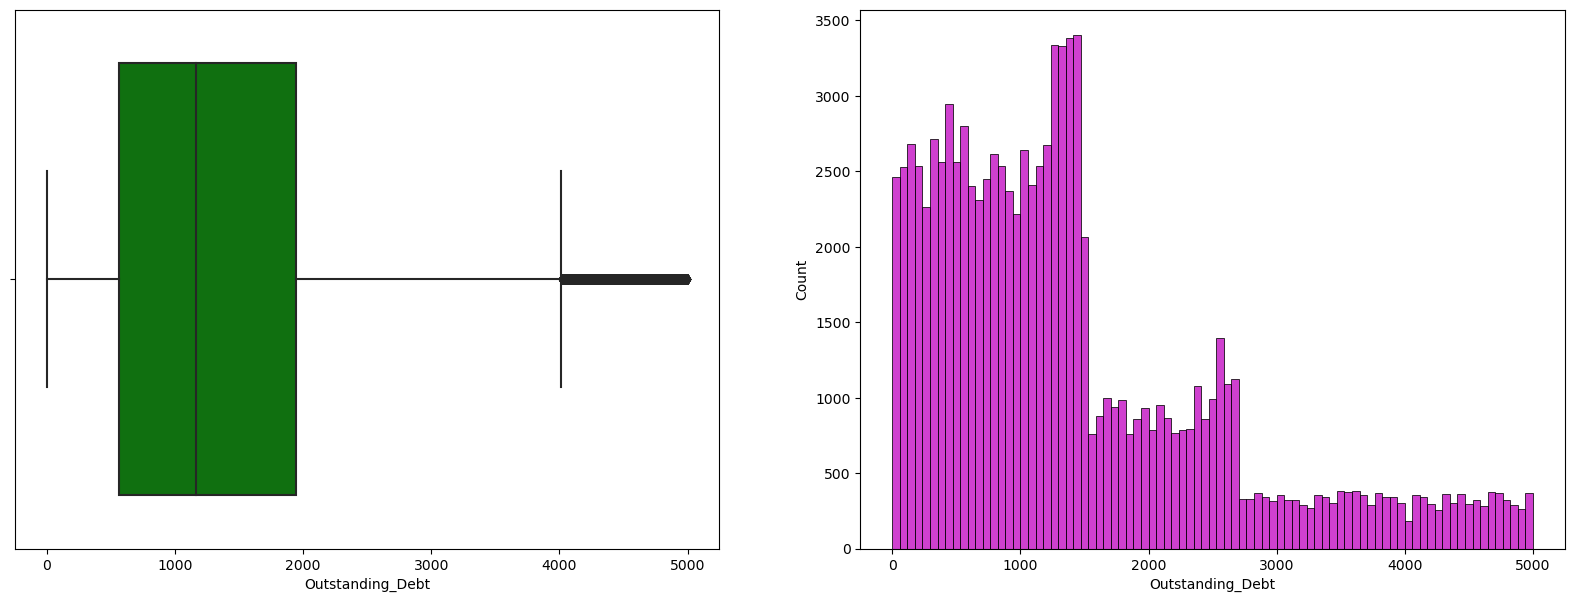

In [43]:
fig, ax = plt.subplots(1, 2, figsize= (20, 7))               # Creating the space for the 2 images, first argument in subplots is rows and second is columns and the figure size
sns.histplot(x = new_df["Outstanding_Debt"], ax =ax[1], color = "m") # ax[1] means image will plot at the second space
sns.boxplot(x = new_df["Outstanding_Debt"], ax = ax[0], color = "g") # ax[0] means image will plot at the second space
plt.show()

In [44]:
info_of_numerical("Credit_Utilization_Ratio")

The mean of the Credit_Utilization_Ratio is 32.28517251894346
The median of the Credit_Utilization_Ratio is 32.30578367171092
The mode of the Credit_Utilization_Ratio is 20.0
The standard deviation of the Credit_Utilization_Ratio is 5.116875070150902
Number of missing values in the Credit_Utilization_Ratio is 0


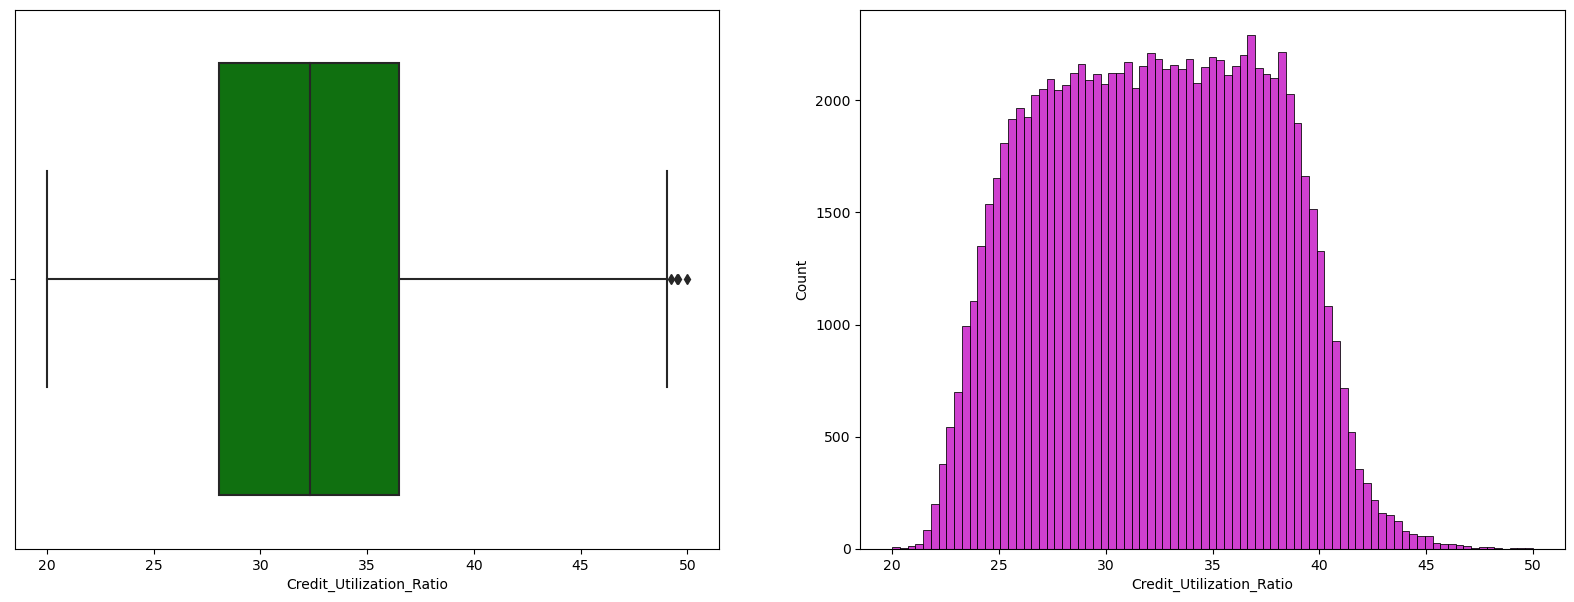

In [45]:
fig, ax = plt.subplots(1, 2, figsize= (20, 7))               # Creating the space for the 2 images, first argument in subplots is rows and second is columns and the figure size
sns.histplot(x = new_df["Credit_Utilization_Ratio"], ax =ax[1], color = "m") # ax[1] means image will plot at the second space
sns.boxplot(x = new_df["Credit_Utilization_Ratio"], ax = ax[0], color = "g") # ax[0] means image will plot at the second space
plt.show()

In [46]:
info_of_numerical("Total_EMI_per_month")

The mean of the Total_EMI_per_month is 1403.1182166159347
The median of the Total_EMI_per_month is 69.24947329972044
The mode of the Total_EMI_per_month is 0.0
The standard deviation of the Total_EMI_per_month is 8306.041270321295
Number of missing values in the Total_EMI_per_month is 0


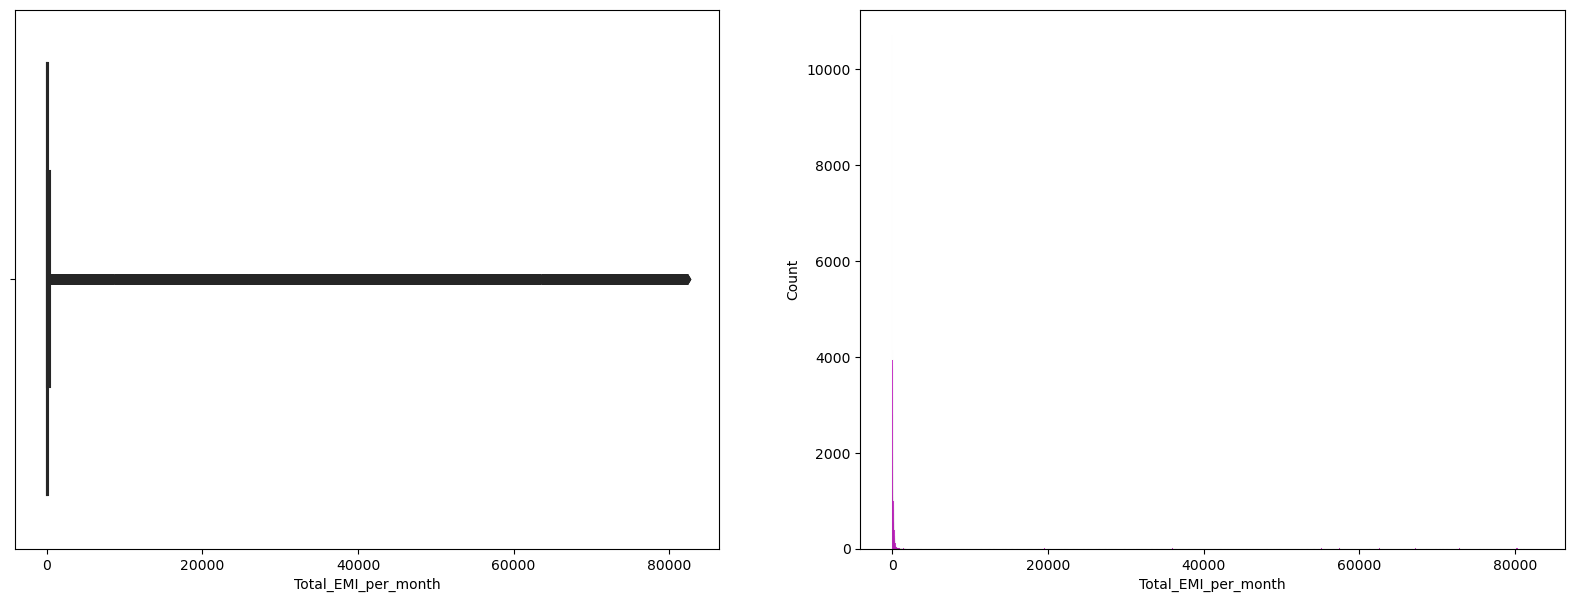

In [47]:
fig, ax = plt.subplots(1, 2, figsize= (20, 7))               # Creating the space for the 2 images, first argument in subplots is rows and second is columns and the figure size
sns.histplot(x = new_df["Total_EMI_per_month"], ax =ax[1], color = "m") # ax[1] means image will plot at the second space
sns.boxplot(x = new_df["Total_EMI_per_month"], ax = ax[0], color = "g") # ax[0] means image will plot at the second space
plt.show()

In [48]:
column_name = 'Amount_invested_monthly'
new_df[column_name] = new_df[column_name].str.replace('_', '').astype(float)
info_of_numerical("Amount_invested_monthly")

The mean of the Amount_invested_monthly is 637.412998407873
The median of the Amount_invested_monthly is 135.92568154608836
The mode of the Amount_invested_monthly is 10000.0
The standard deviation of the Amount_invested_monthly is 2043.3193274670216
Number of missing values in the Amount_invested_monthly is 4479


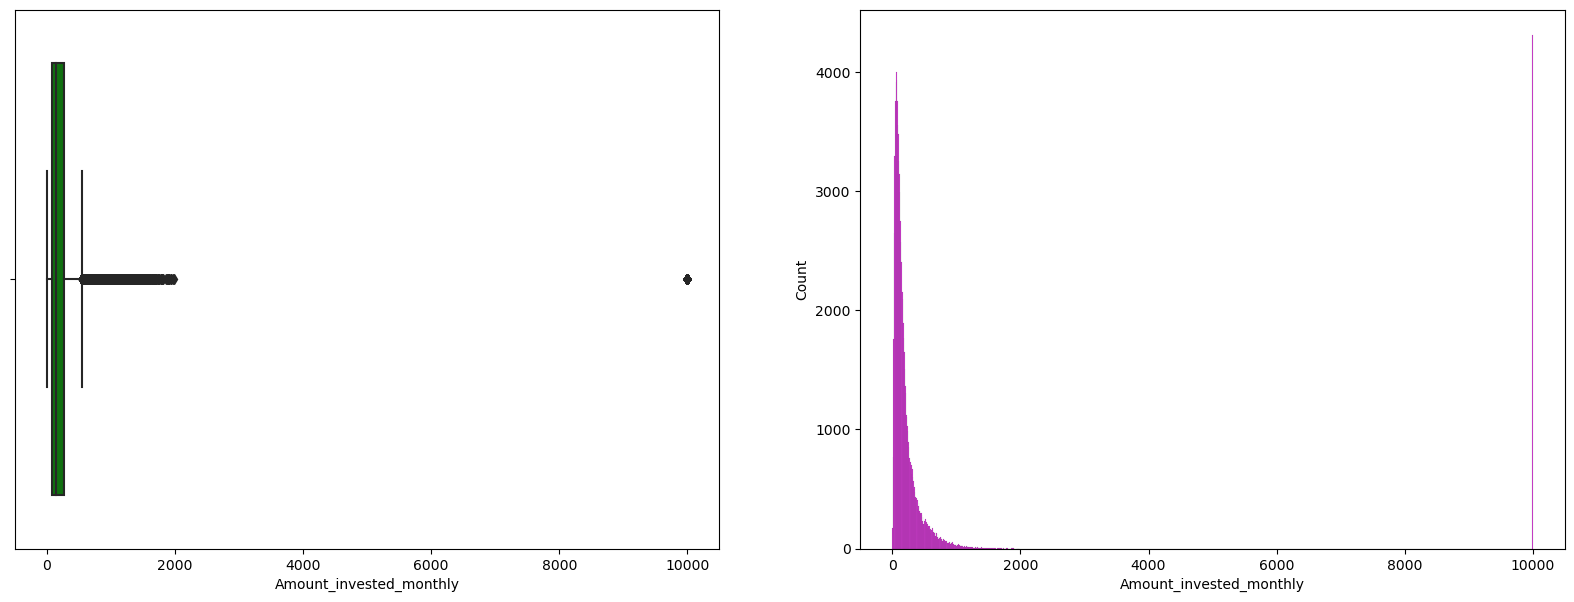

In [49]:
fig, ax = plt.subplots(1, 2, figsize= (20, 7))               # Creating the space for the 2 images, first argument in subplots is rows and second is columns and the figure size
sns.histplot(x = new_df["Amount_invested_monthly"], ax =ax[1], color = "m") # ax[1] means image will plot at the second space
sns.boxplot(x = new_df["Amount_invested_monthly"], ax = ax[0], color = "g") # ax[0] means image will plot at the second space
plt.show()

In [50]:
column_name = 'Monthly_Balance'
new_df[column_name] = new_df[column_name].str.replace('_','').astype(float)
info_of_numerical("Monthly_Balance")

The mean of the Monthly_Balance is -3.0885804884075278e+22
The median of the Monthly_Balance is 336.44926592668395
The mode of the Monthly_Balance is -3.333333333333333e+26
The standard deviation of the Monthly_Balance is 3.208491911408634e+24
Number of missing values in the Monthly_Balance is 2868


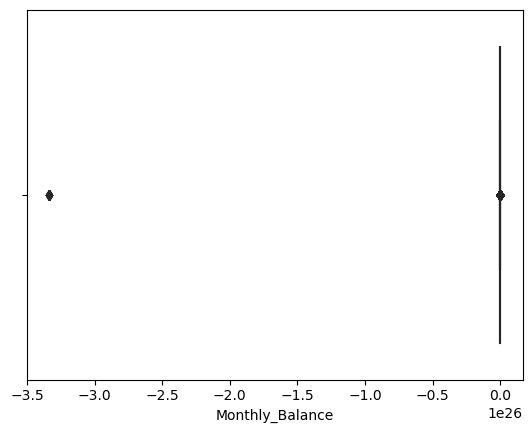

In [51]:
sns.boxplot(x = new_df["Monthly_Balance"],color = "g") # ax[0] means image will plot at the second space
plt.show()

In [52]:
# Select the columns for outlier detection
columns_to_treat = ["Age", "Monthly_Inhand_Salary", "Annual_Income", "Num_Bank_Accounts", "Num_Credit_Card",
                    "Interest_Rate","Num_of_Loan", "Delay_from_due_date", "Num_of_Delayed_Payment", "Changed_Credit_Limit",
                    "Num_Credit_Inquiries", "Outstanding_Debt", "Credit_Utilization_Ratio",
                    "Total_EMI_per_month", "Amount_invested_monthly", "Monthly_Balance"]

for column in columns_to_treat:
    # Calculate the interquartile range (IQR)
    Q1 = new_df[column].quantile(0.25)
    Q3 = new_df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define the outlier threshold
    outlier_threshold = 1.5

    # Identify outliers using the IQR method
    lower_bound = Q1 - outlier_threshold * IQR
    upper_bound = Q3 + outlier_threshold * IQR
    outliers = new_df[(new_df[column] < lower_bound) | (new_df[column] > upper_bound)]

    # Calculate the median of non-outlier data
    median = new_df[(new_df[column] >= lower_bound) & (new_df[column] <= upper_bound)][column].median()

    # Replace outliers with the median value
    new_df.loc[new_df[column] < lower_bound, column] = median
    new_df.loc[new_df[column] > upper_bound, column] = median

In [53]:
new_df.isna().sum()

Month                           0
Age                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit         2091
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              2868
Credit_Score                    0
dtype: int64

In [54]:
# List of columns to fill missing values
columns_to_fill = ['Monthly_Inhand_Salary', 'Num_of_Delayed_Payment','Changed_Credit_Limit', 'Num_Credit_Inquiries',
                   'Amount_invested_monthly',"Monthly_Balance"]

# Fill missing values with the mean for each column
for column in columns_to_fill:
    new_df[column].fillna(new_df[column].mean(), inplace=True)

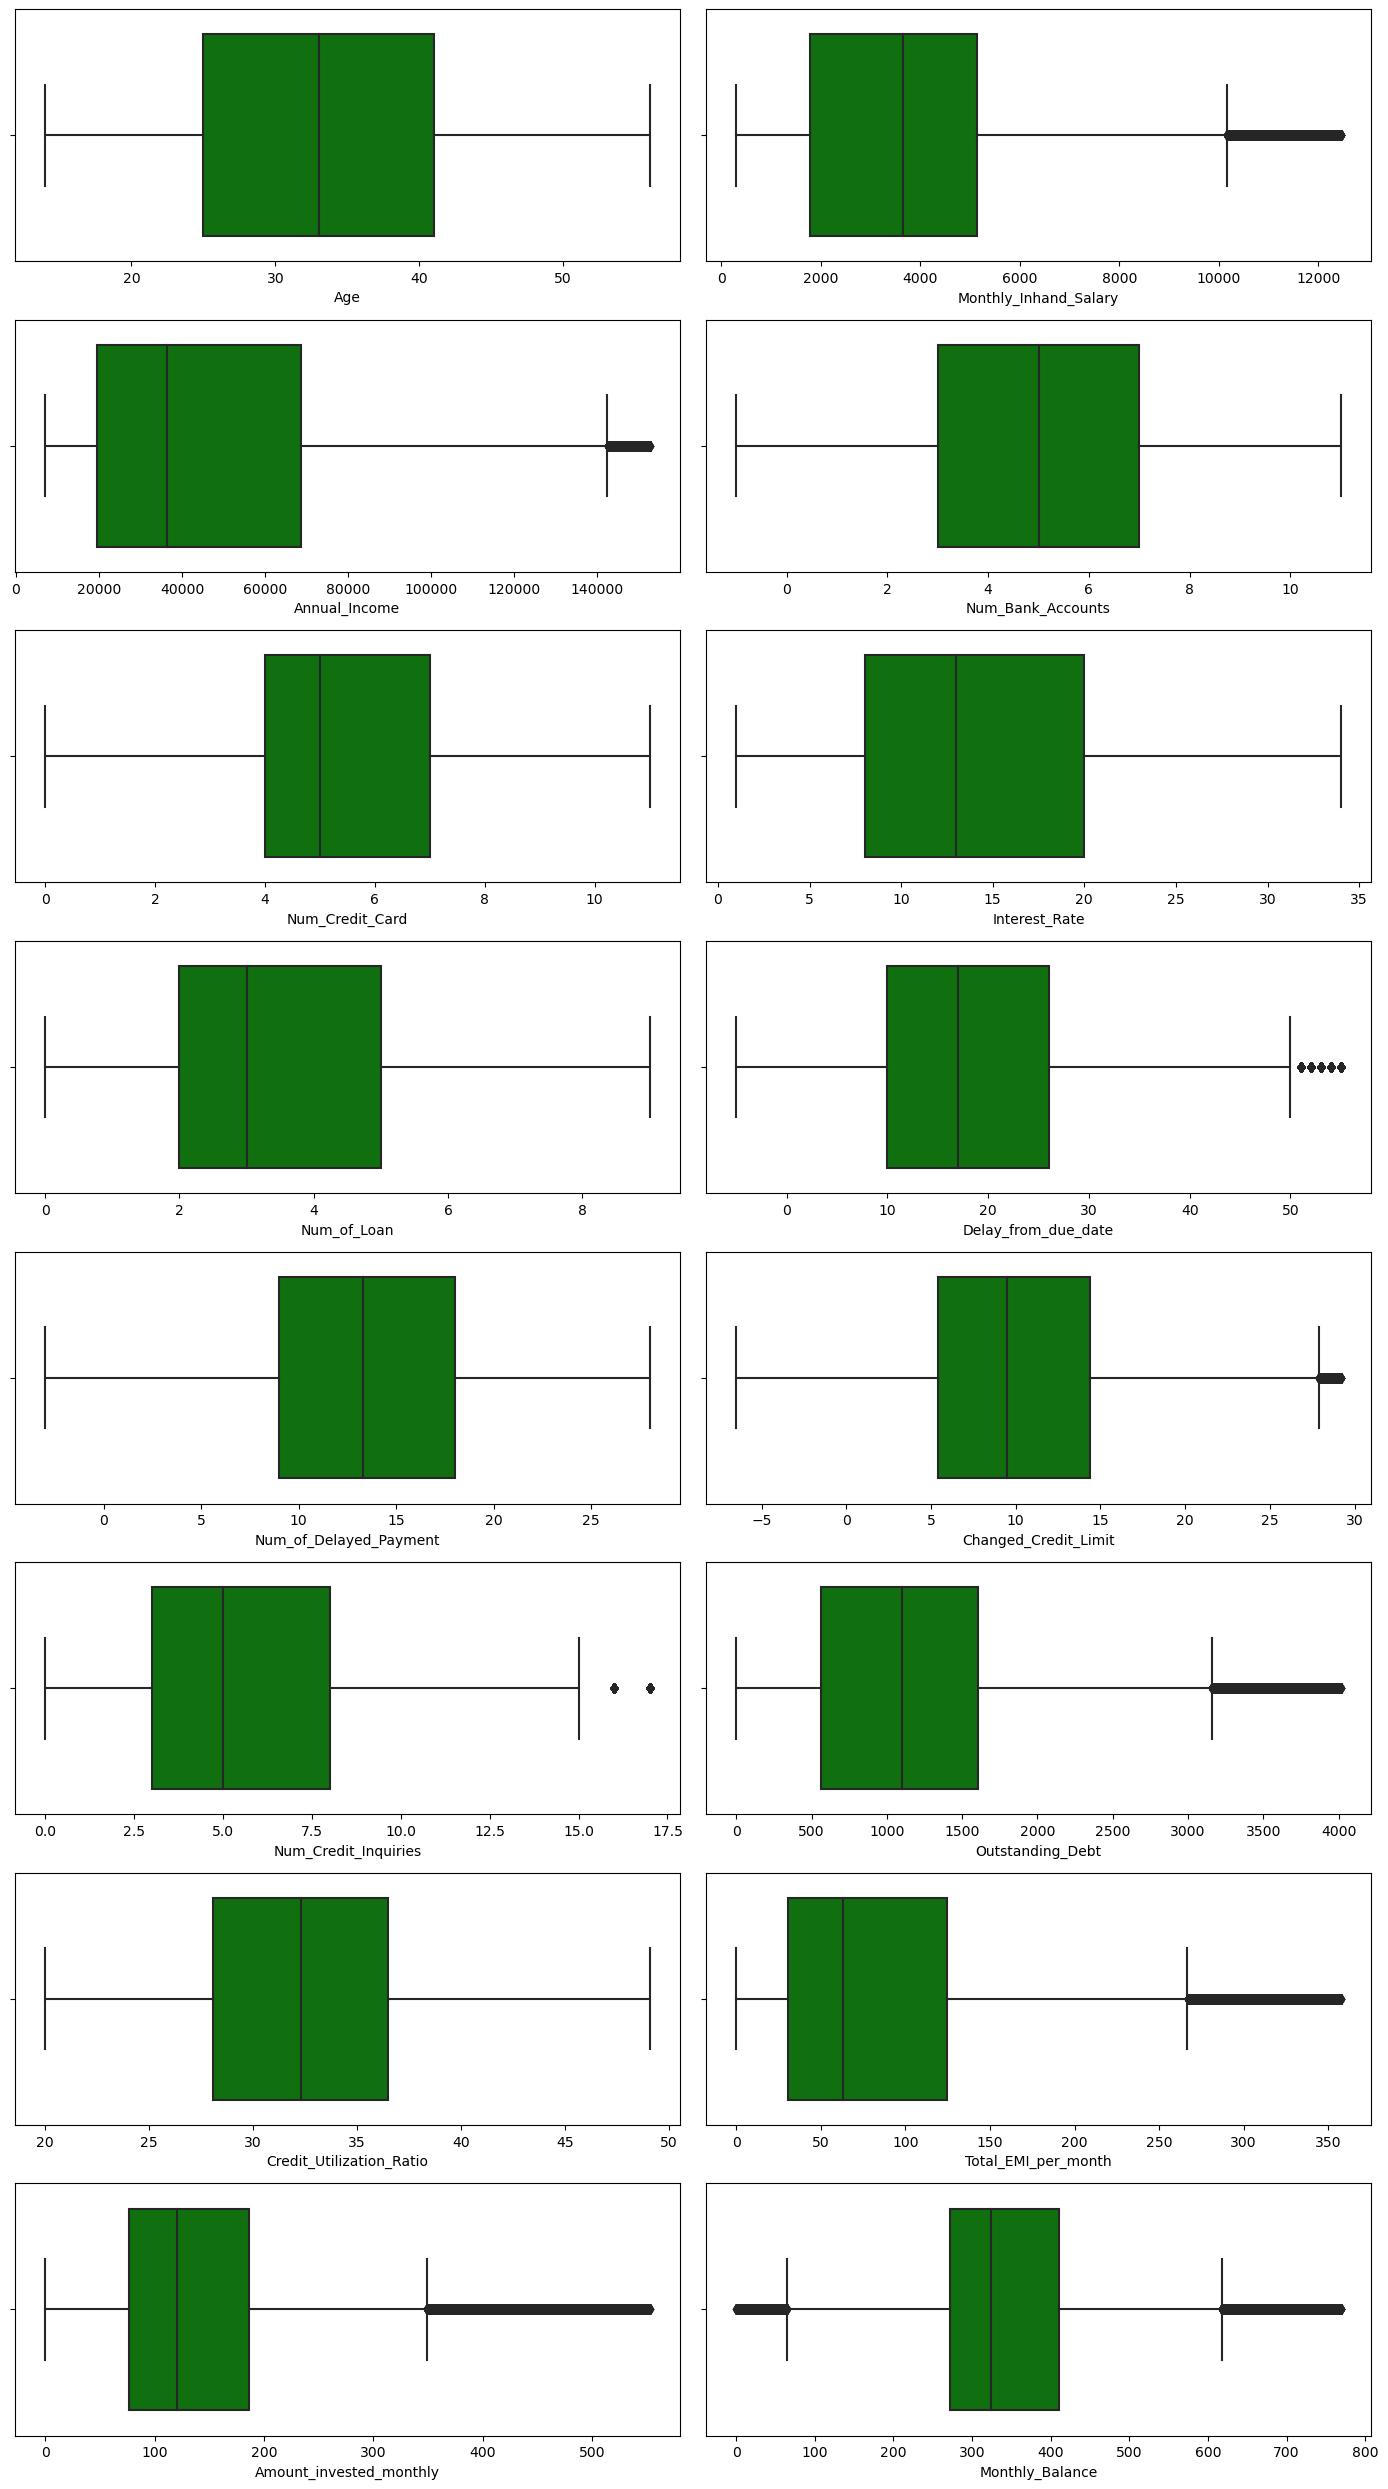

In [55]:
d = ["Age","Monthly_Inhand_Salary", "Annual_Income", "Num_Bank_Accounts", "Num_Credit_Card", "Interest_Rate",
        "Num_of_Loan","Delay_from_due_date", "Num_of_Delayed_Payment", "Changed_Credit_Limit",
        "Num_Credit_Inquiries", "Outstanding_Debt", "Credit_Utilization_Ratio",
        "Total_EMI_per_month", "Amount_invested_monthly", "Monthly_Balance"]

# Convert columns to numeric types
numeric_columns = [pd.to_numeric(new_df[column], errors='coerce') for column in d]

fig, axs = plt.subplots(nrows=8, ncols=2, figsize=(14, 25))
axs = axs.flatten()

for i, var in enumerate(numeric_columns):
    sns.boxplot(x=var, data=new_df,ax=axs[i], color = "g")
fig.tight_layout()
plt.show()

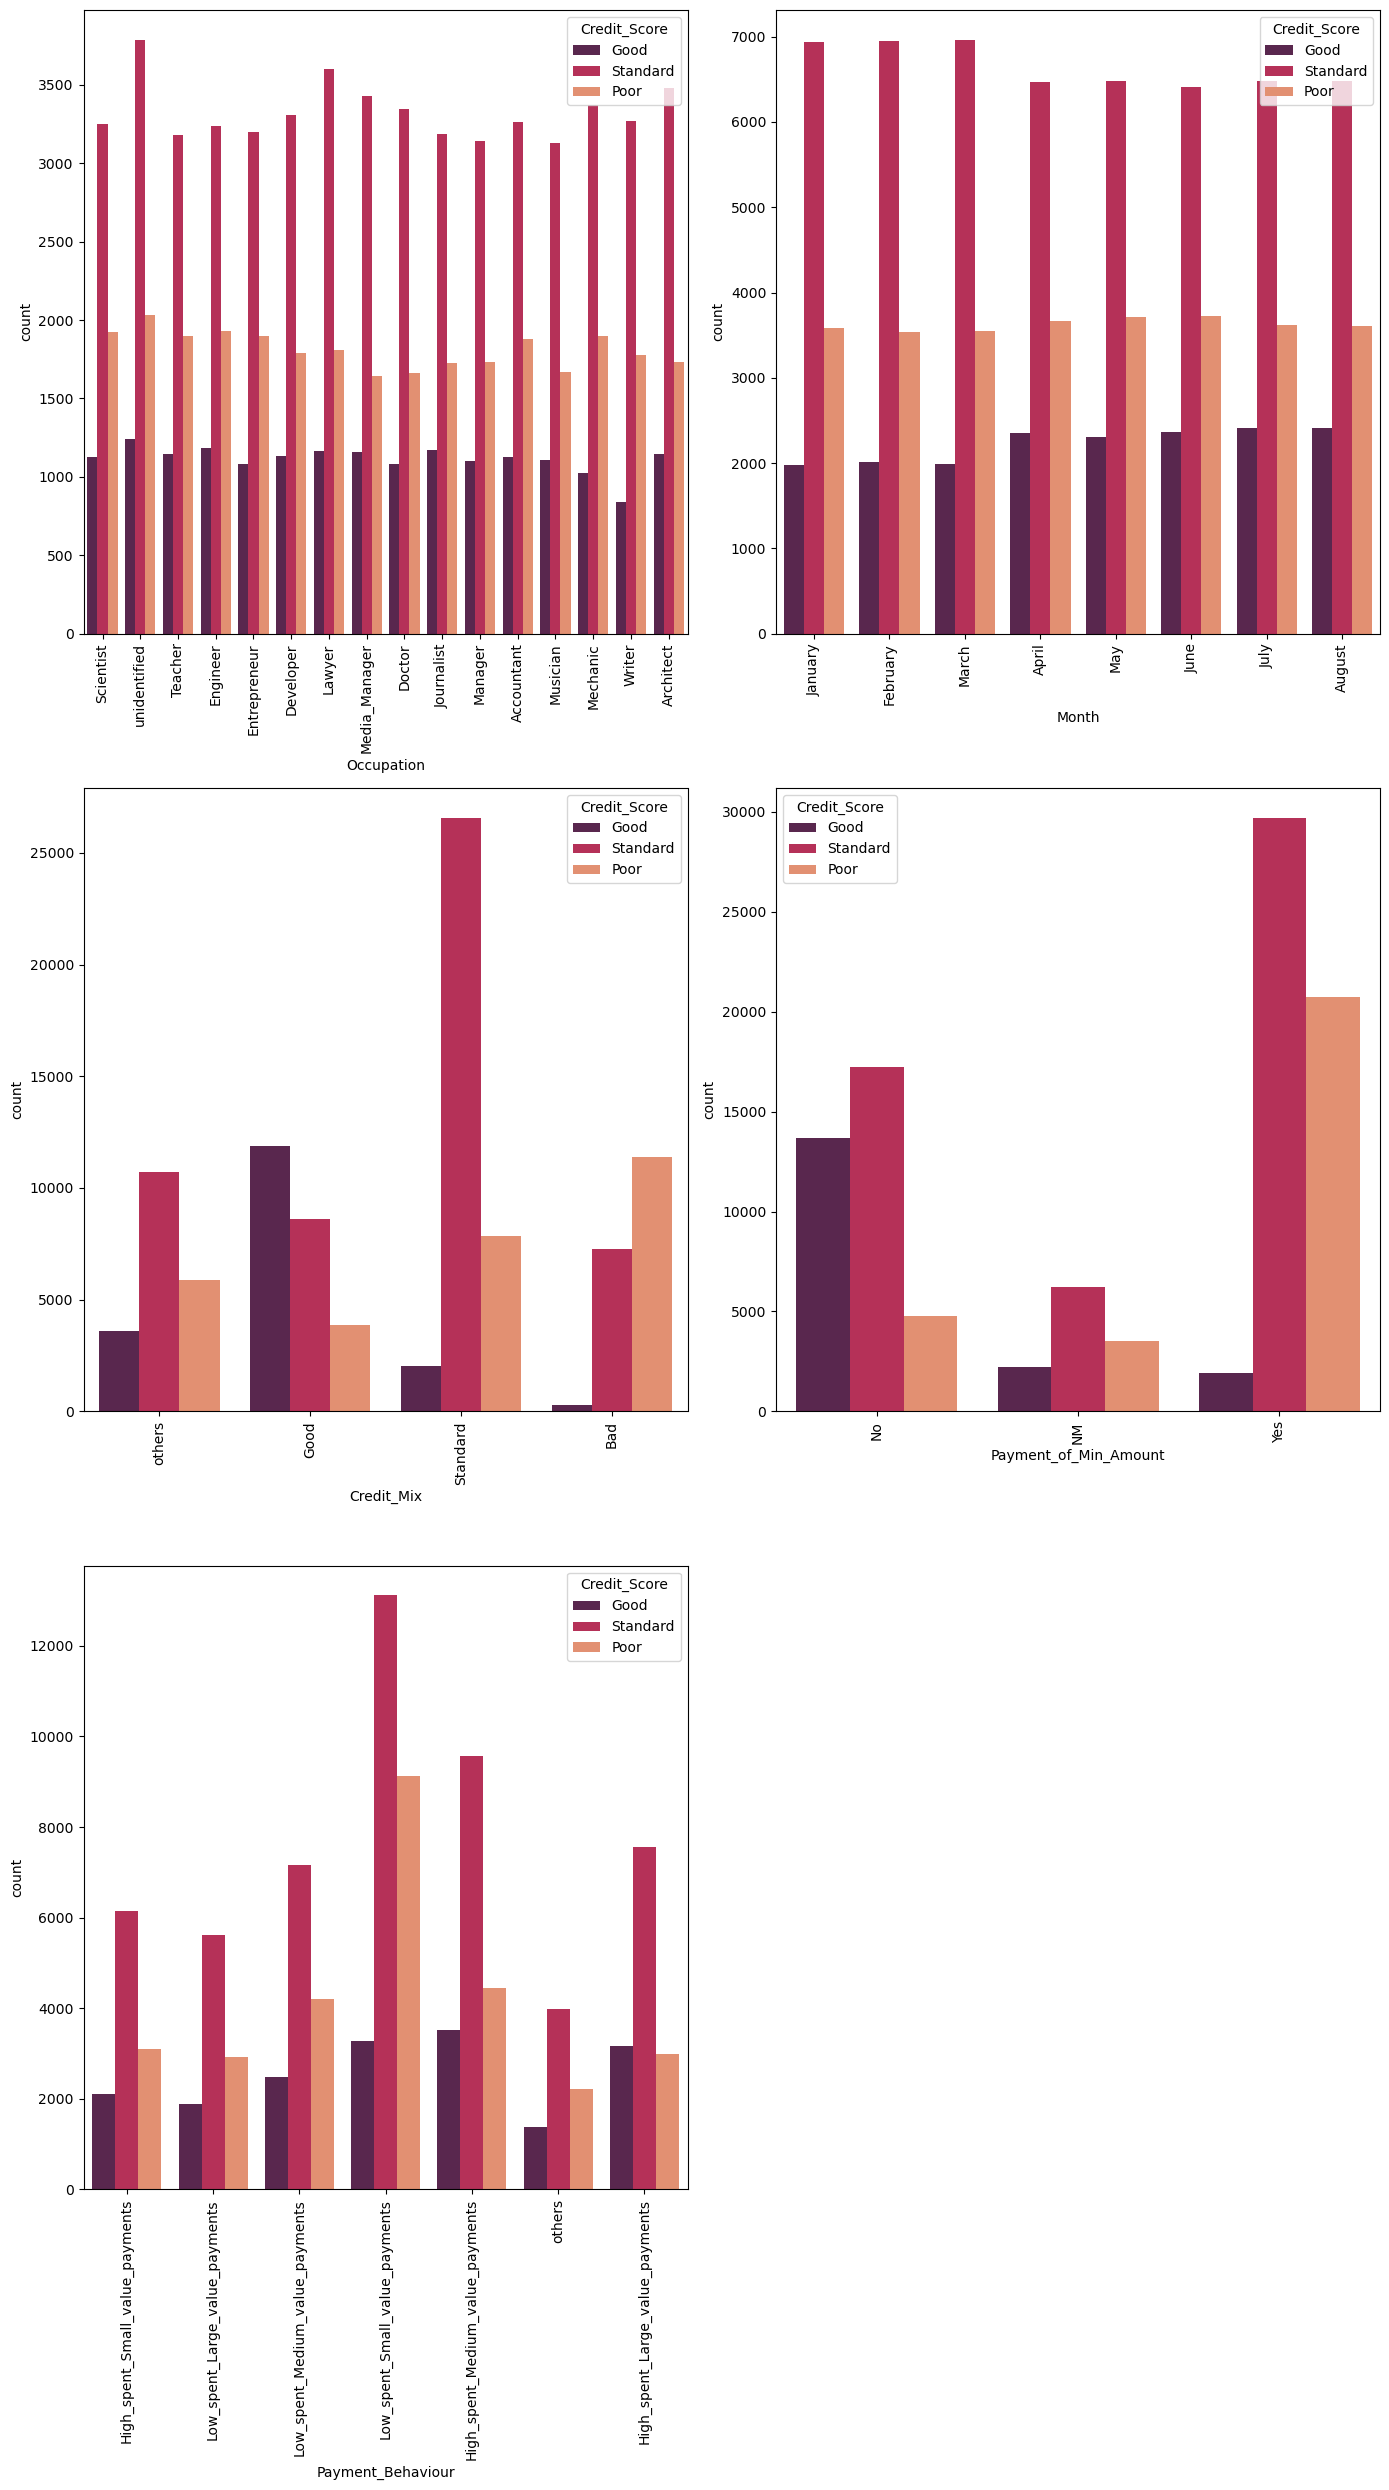

In [56]:
data=["Occupation","Month","Credit_Mix","Payment_of_Min_Amount","Payment_Behaviour"]
fig, axs=plt.subplots(nrows = 3, ncols = 2, figsize = (14,25))
axs =axs.flatten()
for i , var in enumerate(data):
    sns.countplot(x = var,  hue = 'Credit_Score' , data = new_df ,palette='rocket', ax = axs[i])
    axs[i].set_xticklabels(axs[i].get_xticklabels(),rotation=90)
fig.delaxes(axs[5])
fig.tight_layout()
plt.show()

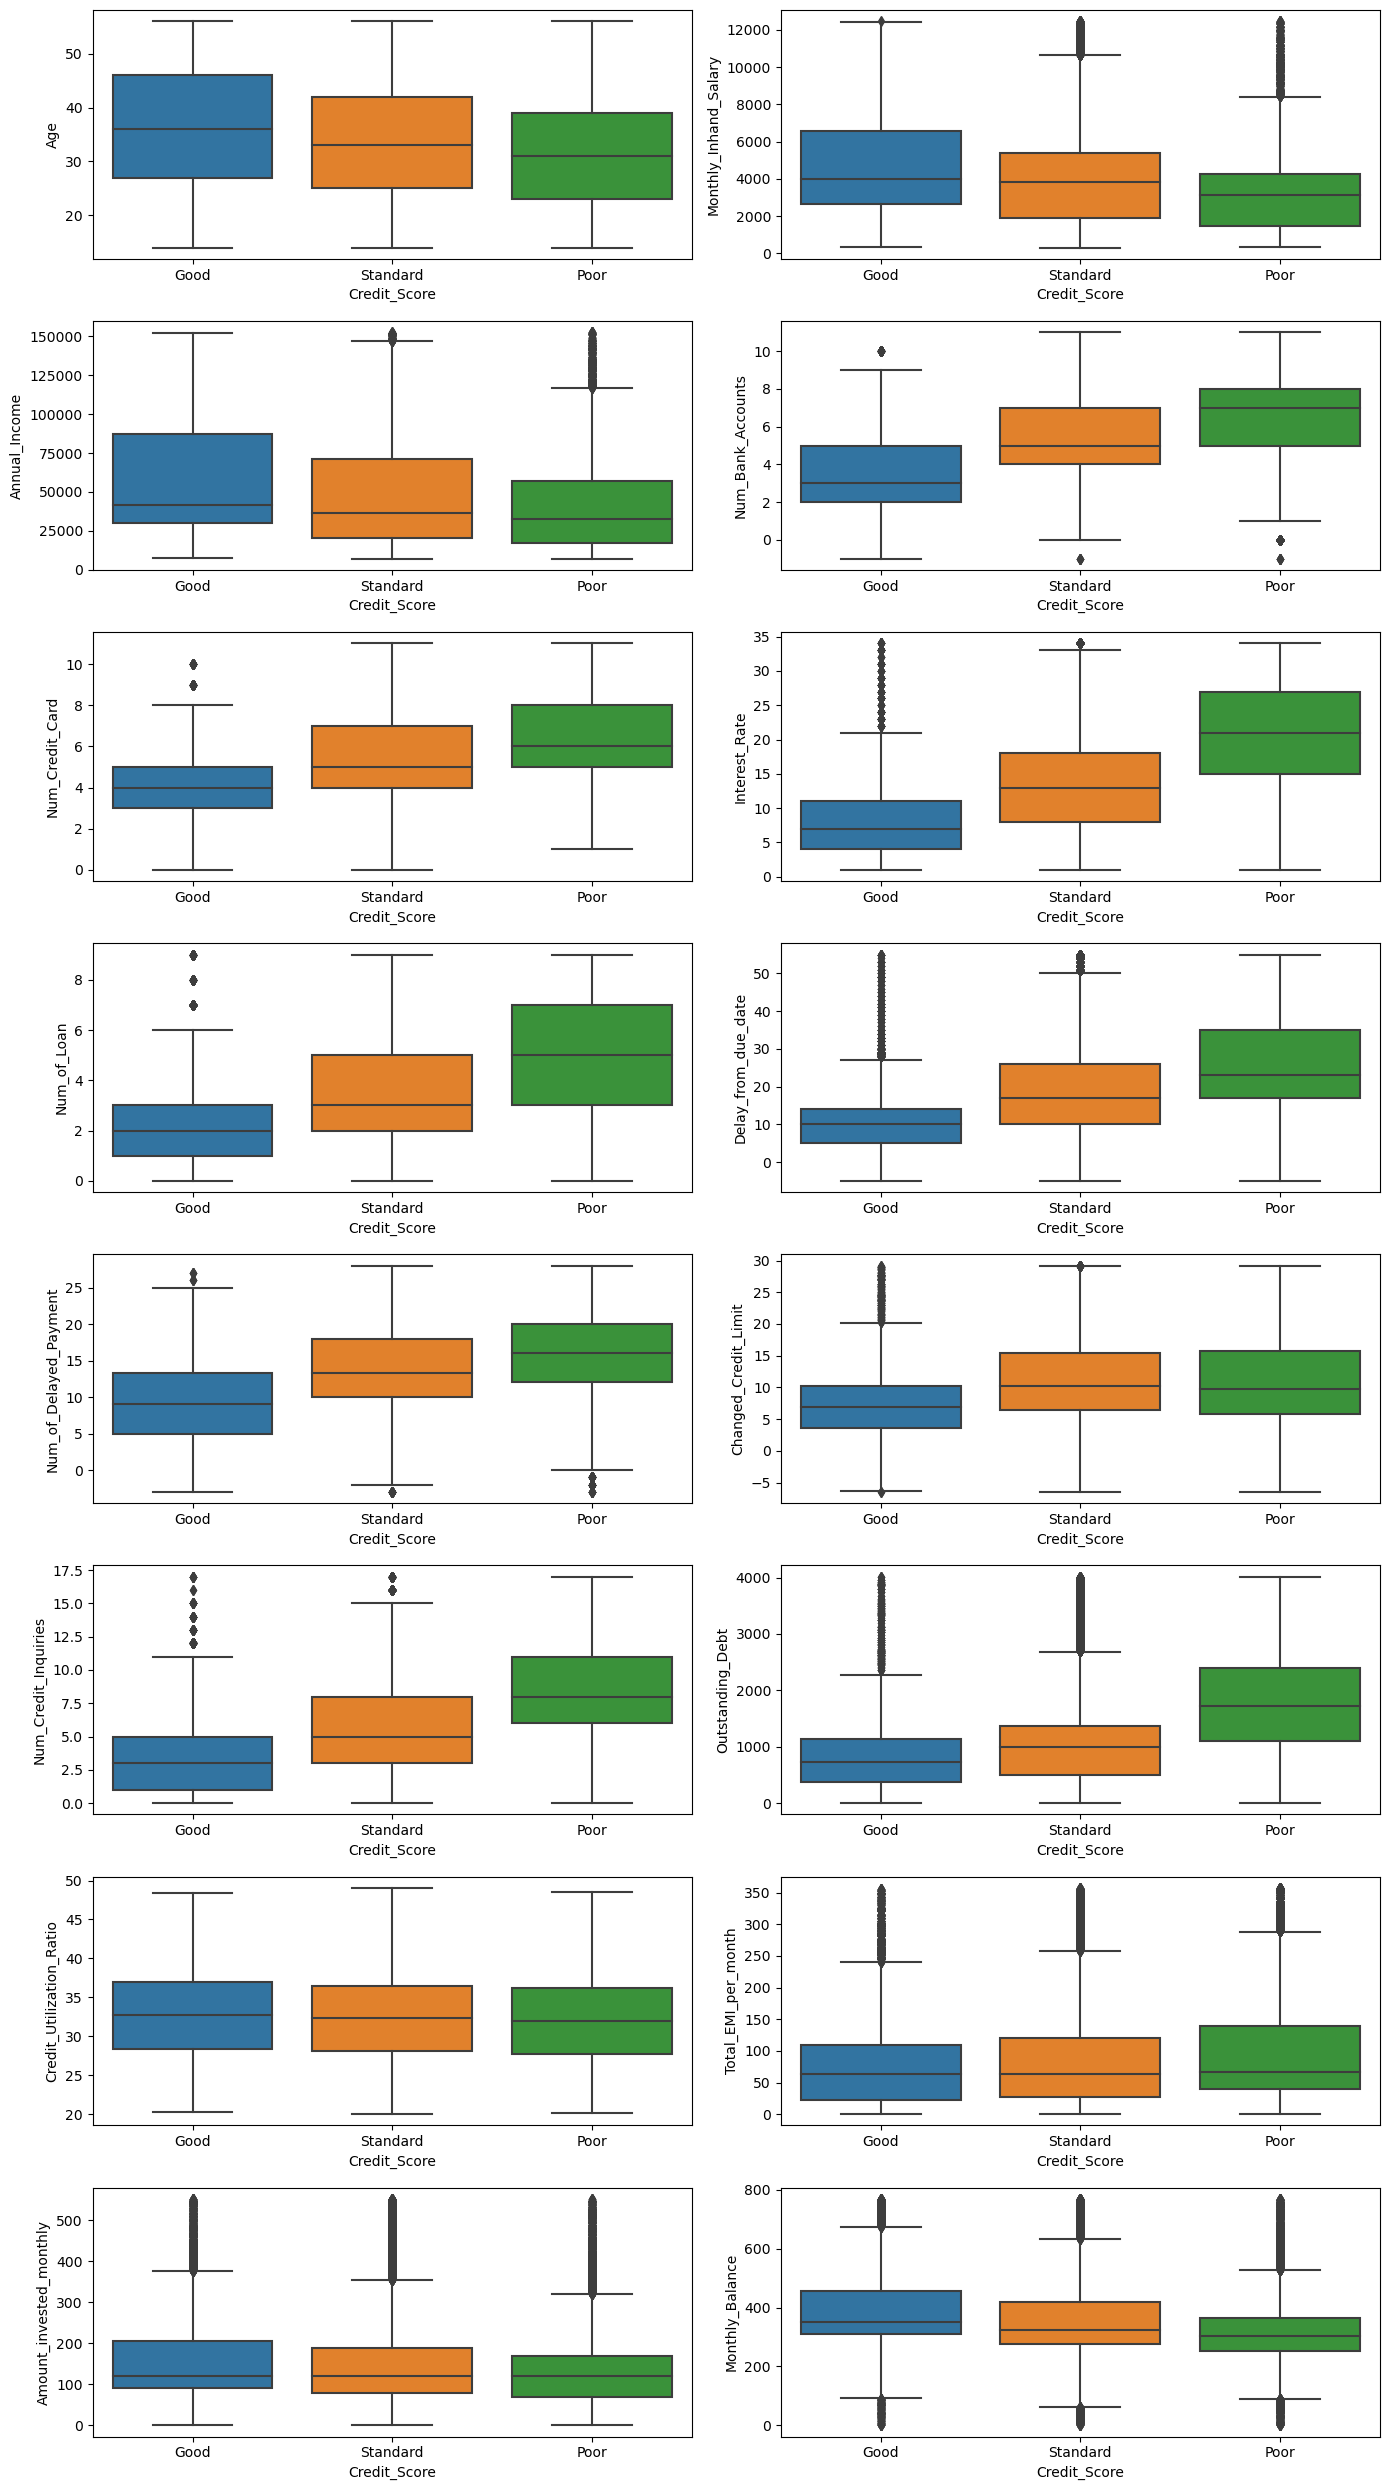

In [57]:
d = ["Age","Monthly_Inhand_Salary", "Annual_Income", "Num_Bank_Accounts", "Num_Credit_Card", "Interest_Rate",
        "Num_of_Loan","Delay_from_due_date", "Num_of_Delayed_Payment", "Changed_Credit_Limit",
        "Num_Credit_Inquiries", "Outstanding_Debt", "Credit_Utilization_Ratio",
        "Total_EMI_per_month", "Amount_invested_monthly", "Monthly_Balance"]

# Convert columns to numeric types
numeric_columns = [pd.to_numeric(new_df[column], errors='coerce') for column in d]

fig, axs = plt.subplots(nrows=8, ncols=2, figsize=(14, 25))
axs = axs.flatten()

for i, var in enumerate(numeric_columns):
    sns.boxplot(y=var,x=new_df["Credit_Score"] ,ax=axs[i])
fig.tight_layout()
plt.show()

In [58]:
new_df.corr()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
Age,1.000000,0.086565,0.074547,-0.186428,-0.143472,-0.211198,-0.204929,-0.164915,-0.173219,-0.154253,-0.242616,-0.186634,0.024659,-0.071436,0.036048,0.093265
Annual_Income,0.086565,1.000000,0.903420,-0.240376,-0.194792,-0.266023,-0.229980,-0.203003,-0.223710,-0.142647,-0.248775,-0.236918,0.146945,0.411206,0.416564,0.391421
Monthly_Inhand_Salary,0.074547,0.903420,1.000000,-0.216894,-0.180118,-0.242842,-0.210218,-0.185631,-0.202522,-0.128571,-0.229914,-0.218903,0.130942,0.380214,0.388760,0.368587
Num_Bank_Accounts,-0.186428,-0.240376,-0.216894,1.000000,0.434742,0.574026,0.459463,0.522398,0.572948,0.314357,0.505268,0.453075,-0.071218,0.098687,-0.120434,-0.217745
Num_Credit_Card,-0.143472,-0.194792,-0.180118,0.434742,1.000000,0.486359,0.404228,0.430616,0.399633,0.234301,0.445672,0.430412,-0.054630,0.106047,-0.094639,-0.187835
Interest_Rate,-0.211198,-0.266023,-0.242842,0.574026,0.486359,1.000000,0.541365,0.524490,0.541201,0.345231,0.614511,0.574548,-0.075361,0.134886,-0.133734,-0.252499
Num_of_Loan,-0.204929,-0.229980,-0.210218,0.459463,0.404228,0.541365,1.000000,0.441833,0.445282,0.339430,0.541167,0.522371,-0.097900,0.433797,-0.112898,-0.351499
Delay_from_due_date,-0.164915,-0.203003,-0.185631,0.522398,0.430616,0.524490,0.441833,1.000000,0.489765,0.269466,0.476715,0.448466,-0.060354,0.115769,-0.101699,-0.203842
Num_of_Delayed_Payment,-0.173219,-0.223710,-0.202522,0.572948,0.399633,0.541201,0.445282,0.489765,1.000000,0.297810,0.470752,0.421675,-0.069901,0.107197,-0.111395,-0.206237
Changed_Credit_Limit,-0.154253,-0.142647,-0.128571,0.314357,0.234301,0.345231,0.339430,0.269466,0.297810,1.000000,0.358257,0.314745,-0.046302,0.097353,-0.074922,-0.145766


<AxesSubplot:>

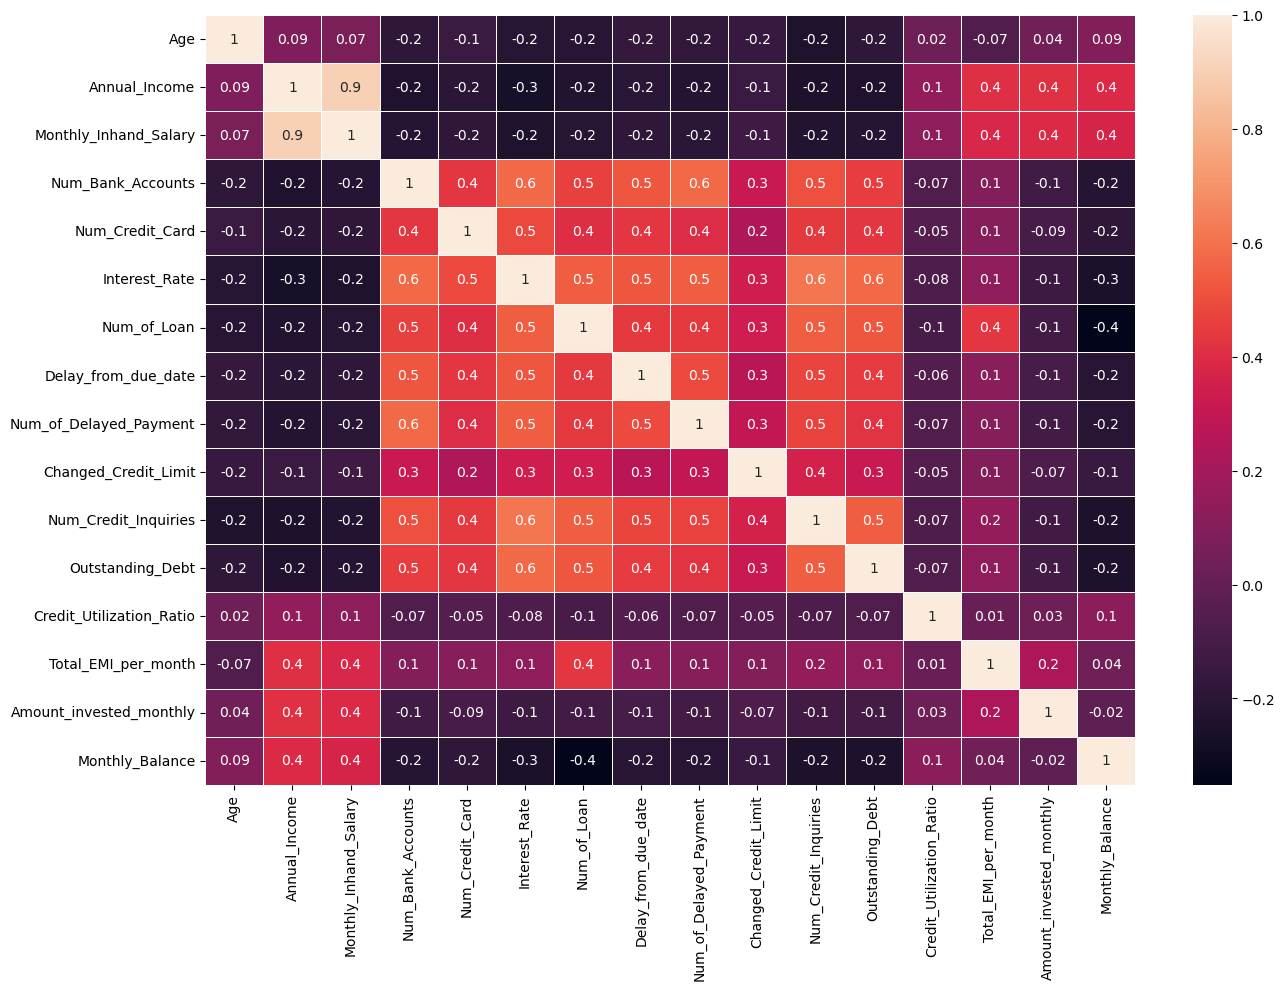

In [59]:
plt.figure(figsize=(15, 10))
sns.heatmap(new_df.corr(), cbar=True , fmt='.1g',annot=True,linewidth=0.5)

In [60]:
new_df.head()

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,January,23.0,Scientist,19114.12,1824.843333,3,4,3,4.0,3,...,4.0,others,809.98,26.822620,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
1,February,23.0,Scientist,19114.12,3980.728315,3,4,3,4.0,-1,...,4.0,Good,809.98,31.944960,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good
2,March,33.0,Scientist,19114.12,3980.728315,3,4,3,4.0,3,...,4.0,Good,809.98,28.609352,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good
3,April,23.0,Scientist,19114.12,3980.728315,3,4,3,4.0,5,...,4.0,Good,809.98,31.377862,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
4,May,23.0,Scientist,19114.12,1824.843333,3,4,3,4.0,6,...,4.0,Good,809.98,24.797347,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good


In [61]:
new_df.tail()

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
99995,April,25.0,Mechanic,39628.99,3359.415833,4,6,7,2.0,23,...,3.0,others,502.38,34.663572,No,35.104023,60.971333,High_spent_Large_value_payments,353.540006,Poor
99996,May,25.0,Mechanic,39628.99,3359.415833,4,6,7,2.0,18,...,3.0,others,502.38,40.565631,No,35.104023,54.185950,High_spent_Medium_value_payments,353.540006,Poor
99997,June,25.0,Mechanic,39628.99,3359.415833,4,6,13,2.0,27,...,3.0,Good,502.38,41.255522,No,35.104023,24.028477,High_spent_Large_value_payments,353.540006,Poor
99998,July,25.0,Mechanic,39628.99,3359.415833,4,6,7,2.0,20,...,3.0,Good,502.38,33.638208,No,35.104023,251.672582,Low_spent_Large_value_payments,353.540006,Standard
99999,August,25.0,Mechanic,39628.99,3359.415833,4,6,7,2.0,18,...,3.0,Good,502.38,34.192463,No,35.104023,167.163865,others,353.540006,Poor


In [62]:
new_df.shape

(100000, 22)

In [63]:
new_df.isna().sum()

Month                       0
Age                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

In [64]:
X= new_df.iloc[:,:-1].values
y= new_df.iloc[:,-1].values

In [65]:
X

array([['January', 23.0, 'Scientist', ..., 80.41529543900253,
        'High_spent_Small_value_payments', 312.49408867943663],
       ['February', 23.0, 'Scientist', ..., 118.28022162236736,
        'Low_spent_Large_value_payments', 284.62916249607184],
       ['March', 33.0, 'Scientist', ..., 81.699521264648,
        'Low_spent_Medium_value_payments', 331.2098628537912],
       ...,
       ['June', 25.0, 'Mechanic', ..., 24.02847744864441,
        'High_spent_Large_value_payments', 353.54000583721495],
       ['July', 25.0, 'Mechanic', ..., 251.67258219721603,
        'Low_spent_Large_value_payments', 353.54000583721495],
       ['August', 25.0, 'Mechanic', ..., 167.1638651610451, 'others',
        353.54000583721495]], dtype=object)

In [66]:
y

array(['Good', 'Good', 'Good', ..., 'Poor', 'Standard', 'Poor'],
      dtype=object)

In [67]:
subs_encoder=preprocessing.LabelEncoder()
subs_encoder.fit(new_df['Credit_Score'])
print(subs_encoder.classes_)
new_df['Credit_Score']=subs_encoder.transform(new_df['Credit_Score'])
new_df.head()

['Good' 'Poor' 'Standard']


,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,January,23.0,Scientist,19114.12,1824.843333,3,4,3,4.0,3,...,4.0,others,809.98,26.822620,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,0
1,February,23.0,Scientist,19114.12,3980.728315,3,4,3,4.0,-1,...,4.0,Good,809.98,31.944960,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,0
2,March,33.0,Scientist,19114.12,3980.728315,3,4,3,4.0,3,...,4.0,Good,809.98,28.609352,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,0
3,April,23.0,Scientist,19114.12,3980.728315,3,4,3,4.0,5,...,4.0,Good,809.98,31.377862,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,0
4,May,23.0,Scientist,19114.12,1824.843333,3,4,3,4.0,6,...,4.0,Good,809.98,24.797347,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,0


In [68]:
new_df["Month"].unique()

array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August'], dtype=object)

In [69]:
label_mapping = {
    'January': 1,
    'February': 2,
    'March': 3,
    'April': 4,
    'May': 5,
    'June': 6,
    'July': 7,
    'August': 8
}
new_df['Month'] = new_df['Month'].replace(label_mapping)
new_df.head()

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,1,23.0,Scientist,19114.12,1824.843333,3,4,3,4.0,3,...,4.0,others,809.98,26.822620,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,0
1,2,23.0,Scientist,19114.12,3980.728315,3,4,3,4.0,-1,...,4.0,Good,809.98,31.944960,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,0
2,3,33.0,Scientist,19114.12,3980.728315,3,4,3,4.0,3,...,4.0,Good,809.98,28.609352,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,0
3,4,23.0,Scientist,19114.12,3980.728315,3,4,3,4.0,5,...,4.0,Good,809.98,31.377862,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,0
4,5,23.0,Scientist,19114.12,1824.843333,3,4,3,4.0,6,...,4.0,Good,809.98,24.797347,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,0


In [70]:
subs_encoder=preprocessing.LabelEncoder()
subs_encoder.fit(new_df['Credit_Mix'])
print(subs_encoder.classes_)
new_df['Credit_Mix']=subs_encoder.transform(new_df['Credit_Mix'])
new_df.head()

['Bad' 'Good' 'Standard' 'others']


,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,1,23.0,Scientist,19114.12,1824.843333,3,4,3,4.0,3,...,4.0,3,809.98,26.822620,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,0
1,2,23.0,Scientist,19114.12,3980.728315,3,4,3,4.0,-1,...,4.0,1,809.98,31.944960,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,0
2,3,33.0,Scientist,19114.12,3980.728315,3,4,3,4.0,3,...,4.0,1,809.98,28.609352,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,0
3,4,23.0,Scientist,19114.12,3980.728315,3,4,3,4.0,5,...,4.0,1,809.98,31.377862,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,0
4,5,23.0,Scientist,19114.12,1824.843333,3,4,3,4.0,6,...,4.0,1,809.98,24.797347,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,0


In [71]:
subs_encoder=preprocessing.LabelEncoder()
subs_encoder.fit(new_df['Payment_of_Min_Amount'])
print(subs_encoder.classes_)
new_df['Payment_of_Min_Amount']=subs_encoder.transform(new_df['Payment_of_Min_Amount'])
new_df.head()

['NM' 'No' 'Yes']


,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,1,23.0,Scientist,19114.12,1824.843333,3,4,3,4.0,3,...,4.0,3,809.98,26.822620,1,49.574949,80.415295,High_spent_Small_value_payments,312.494089,0
1,2,23.0,Scientist,19114.12,3980.728315,3,4,3,4.0,-1,...,4.0,1,809.98,31.944960,1,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,0
2,3,33.0,Scientist,19114.12,3980.728315,3,4,3,4.0,3,...,4.0,1,809.98,28.609352,1,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,0
3,4,23.0,Scientist,19114.12,3980.728315,3,4,3,4.0,5,...,4.0,1,809.98,31.377862,1,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,0
4,5,23.0,Scientist,19114.12,1824.843333,3,4,3,4.0,6,...,4.0,1,809.98,24.797347,1,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,0


In [72]:
columns_to_encode = ['Occupation','Payment_Behaviour']
encoded_df = pd.get_dummies(new_df[columns_to_encode])
new_df= pd.concat([new_df, encoded_df], axis=1)
new_df.drop(columns_to_encode, axis=1, inplace=True)
new_df

,Month,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Occupation_Teacher,Occupation_Writer,Occupation_unidentified,Payment_Behaviour_High_spent_Large_value_payments,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments,Payment_Behaviour_others
0,1,23.0,19114.12,1824.843333,3,4,3,4.0,3,7.000000,...,0,0,0,0,0,1,0,0,0,0
1,2,23.0,19114.12,3980.728315,3,4,3,4.0,-1,13.319835,...,0,0,0,0,0,0,1,0,0,0
2,3,33.0,19114.12,3980.728315,3,4,3,4.0,3,7.000000,...,0,0,0,0,0,0,0,1,0,0
3,4,23.0,19114.12,3980.728315,3,4,3,4.0,5,4.000000,...,0,0,0,0,0,0,0,0,1,0
4,5,23.0,19114.12,1824.843333,3,4,3,4.0,6,13.319835,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,4,25.0,39628.99,3359.415833,4,6,7,2.0,23,7.000000,...,0,0,0,1,0,0,0,0,0,0
99996,5,25.0,39628.99,3359.415833,4,6,7,2.0,18,7.000000,...,0,0,0,0,1,0,0,0,0,0
99997,6,25.0,39628.99,3359.415833,4,6,13,2.0,27,6.000000,...,0,0,0,1,0,0,0,0,0,0
99998,7,25.0,39628.99,3359.415833,4,6,7,2.0,20,13.319835,...,0,0,0,0,0,0,1,0,0,0


In [73]:
new_df.columns

Index(['Month', 'Age', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Payment_of_Min_Amount',
       'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance',
       'Credit_Score', 'Occupation_Accountant', 'Occupation_Architect',
       'Occupation_Developer', 'Occupation_Doctor', 'Occupation_Engineer',
       'Occupation_Entrepreneur', 'Occupation_Journalist', 'Occupation_Lawyer',
       'Occupation_Manager', 'Occupation_Mechanic', 'Occupation_Media_Manager',
       'Occupation_Musician', 'Occupation_Scientist', 'Occupation_Teacher',
       'Occupation_Writer', 'Occupation_unidentified',
       'Payment_Behaviour_High_spent_Large_value_payments',
       'Payment_Behaviour_High_spent_Medium_value_payments',
       'Payment_

In [74]:
columns = new_df.columns.tolist()
columns.insert(columns.index('Payment_Behaviour_Low_spent_Small_value_payments') + 1, columns.pop(columns.index('Credit_Score')))
new_df = new_df[columns]
new_df

,Month,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Occupation_Writer,Occupation_unidentified,Payment_Behaviour_High_spent_Large_value_payments,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments,Payment_Behaviour_others,Credit_Score
0,1,23.0,19114.12,1824.843333,3,4,3,4.0,3,7.000000,...,0,0,0,0,1,0,0,0,0,0
1,2,23.0,19114.12,3980.728315,3,4,3,4.0,-1,13.319835,...,0,0,0,0,0,1,0,0,0,0
2,3,33.0,19114.12,3980.728315,3,4,3,4.0,3,7.000000,...,0,0,0,0,0,0,1,0,0,0
3,4,23.0,19114.12,3980.728315,3,4,3,4.0,5,4.000000,...,0,0,0,0,0,0,0,1,0,0
4,5,23.0,19114.12,1824.843333,3,4,3,4.0,6,13.319835,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,4,25.0,39628.99,3359.415833,4,6,7,2.0,23,7.000000,...,0,0,1,0,0,0,0,0,0,1
99996,5,25.0,39628.99,3359.415833,4,6,7,2.0,18,7.000000,...,0,0,0,1,0,0,0,0,0,1
99997,6,25.0,39628.99,3359.415833,4,6,13,2.0,27,6.000000,...,0,0,1,0,0,0,0,0,0,1
99998,7,25.0,39628.99,3359.415833,4,6,7,2.0,20,13.319835,...,0,0,0,0,0,1,0,0,0,2


In [75]:
new_df.isnull().sum()

Month                                                 0
Age                                                   0
Annual_Income                                         0
Monthly_Inhand_Salary                                 0
Num_Bank_Accounts                                     0
Num_Credit_Card                                       0
Interest_Rate                                         0
Num_of_Loan                                           0
Delay_from_due_date                                   0
Num_of_Delayed_Payment                                0
Changed_Credit_Limit                                  0
Num_Credit_Inquiries                                  0
Credit_Mix                                            0
Outstanding_Debt                                      0
Credit_Utilization_Ratio                              0
Payment_of_Min_Amount                                 0
Total_EMI_per_month                                   0
Amount_invested_monthly                         

In [76]:
X= new_df.iloc[:,:-1].values
y= new_df.iloc[:,-1].values

In [77]:
X

array([[1.000000e+00, 2.300000e+01, 1.911412e+04, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [2.000000e+00, 2.300000e+01, 1.911412e+04, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [3.000000e+00, 3.300000e+01, 1.911412e+04, ..., 1.000000e+00,
        0.000000e+00, 0.000000e+00],
       ...,
       [6.000000e+00, 2.500000e+01, 3.962899e+04, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [7.000000e+00, 2.500000e+01, 3.962899e+04, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [8.000000e+00, 2.500000e+01, 3.962899e+04, ..., 0.000000e+00,
        0.000000e+00, 1.000000e+00]])

In [78]:
y

array([0, 0, 0, ..., 1, 2, 1])

In [79]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

# logistic regression classifier

In [80]:
from sklearn.linear_model import LogisticRegression
classifier= LogisticRegression(max_iter=1000)
classifier.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [81]:
y_pred=classifier.predict(X_test)
print(y_pred[:10],y_test[:10])

[1 1 2 2 0 2 2 2 2 1] [1 2 1 1 2 2 0 2 2 2]


In [82]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[  810    70  4438]
 [  167  3725  4911]
 [  684  2071 13124]]


In [83]:
print('The accuracy score is ',accuracy_score(y_test,y_pred)*100)

The accuracy score is  58.86333333333334


In [84]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.49      0.15      0.23      5318
           1       0.64      0.42      0.51      8803
           2       0.58      0.83      0.68     15879

    accuracy                           0.59     30000
   macro avg       0.57      0.47      0.47     30000
weighted avg       0.58      0.59      0.55     30000



In [85]:
print('for testing', accuracy_score(y_test, y_pred))
print('for training', accuracy_score(y_train, classifier.predict(X_train)))

for testing 0.5886333333333333
for training 0.5925285714285714


In [86]:
LogisticRegression(max_iter=10000)

LogisticRegression(max_iter=10000)

# Dtree classifier

In [87]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_train

array([[-1.09436348, -0.31099938, -0.83715002, ..., -0.40028415,
        -0.58562055, -0.28650268],
       [ 1.09202716,  0.53620517, -0.04059625, ..., -0.40028415,
        -0.58562055, -0.28650268],
       [ 1.09202716,  1.75994508, -0.33113488, ..., -0.40028415,
        -0.58562055, -0.28650268],
       ...,
       [ 0.65474904, -0.96993625, -0.34623665, ..., -0.40028415,
        -0.58562055, -0.28650268],
       [ 1.52930529,  2.0423466 , -0.75520225, ..., -0.40028415,
        -0.58562055, -0.28650268],
       [ 0.21747091, -0.02859786, -1.09960914, ..., -0.40028415,
         1.70759036, -0.28650268]])

In [88]:
X_test=sc.fit_transform(X_test)
X_test

array([[ 1.08893672, -0.69077211,  0.41734257, ..., -0.40313812,
        -0.58438137, -0.2874746 ],
       [-0.6490287 , -0.69077211, -0.10577921, ..., -0.40313812,
         1.71121129, -0.2874746 ],
       [-0.21453735,  0.72316703, -0.58168872, ..., -0.40313812,
        -0.58438137, -0.2874746 ],
       ...,
       [ 0.21995401, -1.06782255, -0.34514288, ..., -0.40313812,
         1.71121129, -0.2874746 ],
       [ 0.21995401,  1.00595486, -0.31846445, ..., -0.40313812,
         1.71121129, -0.2874746 ],
       [ 1.52342807, -0.69077211,  0.13410173, ..., -0.40313812,
        -0.58438137, -0.2874746 ]])

In [89]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier()
classifier.fit(X_train,y_train)

DecisionTreeClassifier()

In [90]:
y_pred=classifier.predict(X_test)
y_pred

array([1, 0, 2, ..., 1, 1, 2])

In [91]:
y_test

array([1, 2, 1, ..., 0, 1, 2])

In [92]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
confusion_matrix(y_test,y_pred)

array([[ 3048,   389,  1881],
       [  397,  5760,  2646],
       [ 1929,  2439, 11511]], dtype=int64)

In [93]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.57      0.57      0.57      5318
           1       0.67      0.65      0.66      8803
           2       0.72      0.72      0.72     15879

    accuracy                           0.68     30000
   macro avg       0.65      0.65      0.65     30000
weighted avg       0.68      0.68      0.68     30000



In [94]:
accuracy_score(y_test,y_pred)

0.6773

In [95]:
accuracy_score(y_train,classifier.predict(X_train))

1.0

In [96]:
parameters={
    'criterion':["gini","entropy"],
    'splitter':["best","random"],
    'max_depth':[1,2,3,4,5,6,7,8],
    'max_features':["auto","sqrt","log2"]
}

In [97]:
from sklearn.model_selection import GridSearchCV
cv=GridSearchCV(classifier,param_grid=parameters,cv=5,scoring='accuracy')
cv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [98]:
cv.best_params_

{'criterion': 'gini',
 'max_depth': 7,
 'max_features': 'sqrt',
 'splitter': 'best'}

In [99]:
cv.best_score_

0.6604571428571429

In [100]:
modified_classifier=DecisionTreeClassifier(criterion='gini', max_depth= 7, max_features= 'sqrt',splitter='best')
modified_classifier

DecisionTreeClassifier(max_depth=7, max_features='sqrt')

In [101]:
modified_classifier.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=7, max_features='sqrt')

In [102]:
y_train_pred=modified_classifier.predict(X_train)
y_test_pred=modified_classifier.predict(X_test)

In [103]:
accuracy_score(y_train,y_train_pred)

0.6528571428571428

In [104]:
accuracy_score(y_test,y_test_pred)

0.6491333333333333

# SVM classifier

In [105]:
from sklearn.svm import SVC
svc_classifier = SVC(kernel='rbf')            # three types of kernel-rbf,sigmoid,poly
svc_classifier.fit(X_train, y_train)

SVC()

In [ ]:
Modified_classifier=SVC(class_weight='balanced', decision_function_shape= 'ovo', gamma= 'scale',kernel='poly')
Modified_classifier

# Navie bayes classifier

In [ ]:
from sklearn.naive_bayes import GaussianNB
naive = GaussianNB()
naive.fit(X_train, y_train)

In [ ]:
y_pred_naive = naive.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,y_pred_naive))

In [ ]:
accuracy_score(y_test,y_pred_naive)

# KNN classifier

In [ ]:
from sklearn import neighbors
Classifier = neighbors.KNeighborsClassifier()
Classifier.fit(X_train,y_train)

In [ ]:
y_pred = Classifier.predict(X_test)
y_pred

In [ ]:
y_test

In [ ]:
print(confusion_matrix(y_pred,y_test))

In [ ]:
accuracy_score(y_test,y_pred)

# Random forest classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier()
forest.fit(X_train,y_train)

In [ ]:
y_forest = forest.predict(X_test)
y_forest

In [ ]:
np.array(y_test)

In [ ]:
print(confusion_matrix(y_forest,y_test))

In [ ]:
accuracy_score(y_test,y_forest)

In [ ]:
# feature eng.

In [ ]:
new_df.duplicated().sum()

In [ ]:
new_df.columns.duplicated().sum()

In [ ]:
len(new_df.columns)

In [ ]:
unique_cols=[]

for column in new_df.columns:
    if new_df[column].duplicated().any():
        unique_cols.append(column)
len(unique_cols)

In [ ]:
unique_cols

In [ ]:
new_df=new_df[unique_cols]
new_df.head()

In [ ]:
def modeling(X_train,X_test,y_train,y_test):
    
    from sklearn.linear_model import LogisticRegression
    classifier= LogisticRegression(max_iter=1000)
    classifier.fit(X_train,y_train)
    
    y_pred=classifier.predict(X_test)
    
    from sklearn.metrics import confusion_matrix,accuracy_score
    print(confusion_matrix(y_test,y_pred))
    
    print('for testing', accuracy_score(y_test, y_pred))
    print('for training', accuracy_score(y_train, classifier.predict(X_train)))

In [ ]:
modeling(X_train,X_test,y_train,y_test)

In [ ]:
def modeling1(X_train,X_test,y_train,y_test):
    
    from sklearn.ensemble import RandomForestClassifier
    forest = RandomForestClassifier()
    forest.fit(X_train,y_train)
    
    y_forest = forest.predict(X_test)
    
    from sklearn.metrics import confusion_matrix,accuracy_score
    print(confusion_matrix(y_forest,y_test))    
    
    print('for testing', accuracy_score(y_test,y_forest))
    print('for training', accuracy_score(y_train, forest.predict(X_train)))

In [ ]:
modeling1(X_train,X_test,y_train,y_test)

In [ ]:
def modeling2(X_train,X_test,y_train,y_test):
    
    from sklearn.tree import DecisionTreeClassifier
    classifier=DecisionTreeClassifier()
    classifier.fit(X_train,y_train)
    
    y_pred=classifier.predict(X_test)
    
    from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
    print(confusion_matrix(y_test,y_pred))
    
    print('for testing', accuracy_score(y_test, y_pred))
    print('for training', accuracy_score(y_train, classifier.predict(X_train)))

In [ ]:
modeling2(X_train,X_test,y_train,y_test)

In [ ]:
# variance thershold method

from sklearn.feature_selection import VarianceThreshold
sel=VarianceThreshold(threshold=0.05)
sel.fit(X_train)
sum(sel.get_support())

In [ ]:
X_train=sel.transform(X_train)
X_test=sel.transform(X_test)

In [ ]:
X_train.shape

In [ ]:
modeling(X_train,X_test,y_train,y_test)

In [ ]:
modeling1(X_train,X_test,y_train,y_test)

In [ ]:
modeling2(X_train,X_test,y_train,y_test)

In [ ]:
# correlation matrix
X_train=pd.DataFrame(X_train)
#sns.heatmap(X_train.corr())
sns.heatmap(X_train.corr())

In [ ]:
corrmat=X_train.corr()

In [ ]:
cols=X_train.columns
columns_to_drop=[]
for i in range(len(cols)):
    for j in range(i+1,len(cols)):
        if corrmat.loc[cols[i],cols[j]]>0.9 or corrmat.loc[cols[i],cols[j]]<-0.9:
            columns_to_drop.append(cols[j])

In [ ]:
len(columns_to_drop)

In [ ]:
X_train=X_train.drop(labels=columns_to_drop, axis=1)
X_train.shape

In [ ]:
X_test.shape

In [ ]:
X_test=pd.DataFrame(X_test)

In [ ]:
X_test=X_test.drop(labels=columns_to_drop, axis=1)
X_test.shape

In [ ]:
X_train=X_train.values
X_test=X_test.values

In [ ]:
modeling(X_train,X_test,y_train,y_test)

In [ ]:
modeling1(X_train,X_test,y_train,y_test)

In [ ]:
modeling2(X_train,X_test,y_train,y_test)

In [ ]:
# annova method

X_train=pd.DataFrame(X_train)
X_test=pd.DataFrame(X_test)

In [ ]:
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest
sel1=SelectKBest(f_classif, k=39).fit(X_train,y_train)
X_train.columns[sel1.get_support()]

In [ ]:
X_train= sel1.transform(X_train)
X_test= sel1.transform(X_test)

In [ ]:
X_train.shape

In [ ]:
modeling(X_train,X_test,y_train,y_test)

In [ ]:
modeling1(X_train,X_test,y_train,y_test)

In [ ]:
modeling2(X_train,X_test,y_train,y_test)

In [ ]:
# xgboost

In [ ]:
import xgboost as xgb
classifier = xgb.XGBClassifier()
classifier.fit(X_train,y_train)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred= classifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred)*100)

In [ ]:
# kfold
from sklearn.model_selection import cross_val_score
accuracies= cross_val_score(estimator= classifier, X=X_train, y=y_train, cv=10)

print(np.mean(accuracies)*100, np.std(accuracies))